## Importações de Bibliotecas

In [2]:
# Biblioteca para analise e importações dos arquivos 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

ACESSO AO STREAMLIT : https://w5f6sjxipdggatqtxusg6n.streamlit.app/

### Fazendo conexão com o DRIVE. 

### 1. Definição do Problema

# Taxas de Desistência no Ensino Superior do Distrito Federal
Análise das Taxas de Desistência no Ensino Superior do Distrito Federal: Um Estudo nas Dez Instituições Mais Bem Avaliadas pelo MEC em 2021

## Objetivo da Análise
Este estudo tem como objetivo analisar e compreender os fatores associados às taxas de desistência em cursos de graduação no Distrito Federal. A investigação será conduzida com base em dados públicos extraídos de plataformas governamentais, que abrangem informações sobre instituições de ensino superior públicas e privadas. Para fins de recorte metodológico, a amostra será composta pelas dez instituições de ensino superior do DF que obtiveram as melhores avaliações segundo o Índice Geral de Cursos (IGC) do Ministério da Educação (MEC) no ano de 2021.

## Justificativa
A escolha por focar apenas nas dez instituições de ensino superior mais bem avaliadas do Distrito Federal tem como objetivo garantir maior clareza e confiabilidade na análise. Essas instituições costumam ter estruturas mais organizadas e sistemas de gestão mais transparentes, o que facilita o acesso a dados mais completos e padronizados. Além disso, ao analisar faculdades com bom desempenho, buscamos entender se a evasão estudantil também ocorre em contextos considerados positivos — o que pode apontar para questões mais amplas e estruturais no ensino superior brasileiro. Essa delimitação também está relacionada ao fato de este ser um trabalho de início de graduação, o que exige um recorte de dados menor e mais viável, sem a necessidade de incluir todas as instituições do DF ou de outros estados do país.




### 2. Coleta de Dados

### Criando função para otimizara leitura dos arquivos.

In [3]:
def importando_dados(lista_caminho:list[str]):

    # Data frame criado para poder guardar a junção de todos os DataFrames. 
    juntando_dataFrames = pd.DataFrame()

    # Laço for para que ocorra a leitura de todos os arquivos csv de acordo com seus caminhos(caminho local)
    for arquivo in lista_caminho:

        # Listar todas as colunas no arquivo, afim de não baixar todo o arquivo antes de excluir as colunas rejeitadas.
        todas_colunas = pd.read_csv(arquivo, nrows=0,encoding="ISO-8859-1", sep=';').columns.tolist()

        # Definir as colunas que você quer excluir
        # Essas colunas  estão sendo tiradas por se tratar apenas de dados do distrito_Federal, sem necessidade da permanencia de informações implicitamente informadas.
        colunas_para_excluir = ['NO_REGIAO', 'CO_REGIAO','NO_UF','CO_UF','CO_MUNICIPIO','NO_MUNICIPIO','IN_CAPITAL']

        # Listar as colunas que você deseja manter
        colunas_para_manter = [coluna for coluna in todas_colunas if coluna not in colunas_para_excluir]

        # Carregar o arquivo com apenas as colunas que você quer manter
        df = pd.read_csv(arquivo, usecols=colunas_para_manter,encoding="ISO-8859-1", sep=';')

        # Utilizando do groupby para que somente as informações referente ao Distrito-Federal(DF) permaneçam.
        dados_df = df.groupby(['SG_UF'] ).get_group('DF')

        # Juntando os novos DataFrames com os anteriores. 
        juntando_dataFrames = pd.concat([dados_df,juntando_dataFrames],axis=0)

    return juntando_dataFrames

In [4]:
# Criando lista de caminhos onde os arquivos estão sendo mantidos.
caminhos_lista = [
    "D:\\analise_de_Dados\\arquivos_Brutos\\Projeto_censo_educacao_superior\\Microdados do Censo da Educação Superior 2023\\dados\\MICRODADOS_CADASTRO_CURSOS_2023.CSV",
    "D:\\analise_de_Dados\\arquivos_Brutos\\Projeto_censo_educacao_superior\\Microdados do Censo da Educação Superior 2022\\dados\\MICRODADOS_CADASTRO_CURSOS_2022.CSV",
    "D:\\analise_de_Dados\\arquivos_Brutos\\Projeto_censo_educacao_superior\\Microdados do Censo da Educação Superior 2021\\dados\\MICRODADOS_CADASTRO_CURSOS_2021.CSV",
    "D:\\analise_de_Dados\\arquivos_Brutos\\Projeto_censo_educacao_superior\\Microdados do Censo da Educação Superior 2020\\dados\\MICRODADOS_CADASTRO_CURSOS_2020.CSV",
    "D:\\analise_de_Dados\\arquivos_Brutos\\Projeto_censo_educacao_superior\\Microdados do Censo da Educação Superior 2019\\dados\\MICRODADOS_CADASTRO_CURSOS_2019.CSV",
    "D:\\analise_de_Dados\\arquivos_Brutos\\Projeto_censo_educacao_superior\\Microdados do Censo da Educação Superior 2018\\dados\\MICRODADOS_CADASTRO_CURSOS_2018.CSV",
    
]


In [5]:
# Criando o DataFrame para receber o arquivo somente com os Dados do Distrito-Federal( DF)
dados_censo_DF = importando_dados(caminhos_lista).reset_index(drop=True)

C:\Users\Thiago\AppData\Local\Temp\ipykernel_21056\288032912.py:20: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, usecols=colunas_para_manter,encoding="ISO-8859-1", sep=';')
C:\Users\Thiago\AppData\Local\Temp\ipykernel_21056\288032912.py:23: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  dados_df = df.groupby(['SG_UF'] ).get_group('DF')
C:\Users\Thiago\AppData\Local\Temp\ipykernel_21056\288032912.py:20: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, usecols=colunas_para_manter,encoding="ISO-8859-1", sep=';')
C:\Users\Thiago\AppData\Local\Temp\ipykernel_21056\288032912.py:23: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_g

In [6]:
# Importando somente os dados sigla da universidade, para ter os nomes das mesma para melhor identificação
df_cadastro_ies = pd.read_csv("D:\\analise_de_Dados\\arquivos_Brutos\\Projeto_censo_educacao_superior\\Microdados do Censo da Educação Superior 2023\\dados\\MICRODADOS_ED_SUP_IES_2023.csv",sep=';',encoding="ISO-8859-1",usecols=['CO_IES','SG_IES'])

In [7]:
# Juntando Dataframe com os dados das instituições junto com suas respectivas Siglas.
dados_censo_DF_SGIS = pd.merge(dados_censo_DF,df_cadastro_ies,on='CO_IES',how='inner')

In [8]:
# Visualizando Dataframe completo.
dados_censo_DF_SGIS.head(3)

,NU_ANO_CENSO,SG_UF,TP_DIMENSAO,TP_ORGANIZACAO_ACADEMICA,TP_CATEGORIA_ADMINISTRATIVA,TP_REDE,CO_IES,NO_CURSO,CO_CURSO,NO_CINE_ROTULO,...,QT_MAT_ATIV_EXTRACURRICULAR,QT_CONC_ATIV_EXTRACURRICULAR,QT_MOB_ACADEMICA,QT_ING_MOB_ACADEMICA,QT_MAT_MOB_ACADEMICA,QT_CONC_MOB_ACADEMICA,CO_CINE_ROTULO2,IN_COMUNITARIA,IN_CONFESSIONAL,SG_IES
0,2018,DF,1,1,1,1,2,ABI - ARTES CÊNICAS,5001035,ABI Artes e humanidades,...,8.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,UNB
1,2018,DF,1,1,1,1,2,ABI - ARTES PLÁSTICAS,5001034,ABI Artes e humanidades,...,4.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,UNB
2,2018,DF,1,1,1,1,2,ABI - CIÊNCIAS SOCIAIS,5001037,"ABI Ciências sociais, comunicação e informação",...,24.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,UNB


In [9]:
# Visualizando todas as instituições disponíveis.
dados_censo_DF_SGIS['SG_IES'].unique()

array(['UNB', 'UNIP', 'UNICEUB', 'UCB', 'UPIS', 'UDF', 'FADM', 'IESB',
       'UNIEURO', 'Anhanguera DF', 'UNIPLAN', 'FACEF', 'UNIPROJEÇÃO',
       'ESTÁCIO BRASÍLIA', 'FAPRO', 'FACBRAS', 'FALBE', 'UNIPROCESSUS',
       nan, 'ISALBE', 'UNILS', 'FTBB', 'Unicesp', 'FACULDADE FABRAS',
       'UNIMAUÁ', 'FAC CCI', 'ICESP', 'APOGEU', 'UNICEPLAC', 'IDP-BSB',
       'FATEO', 'IFB', 'FACHORIZONTE', 'ISCP', 'FANASPS', 'FATECNA',
       'ESAS', 'FACDF', 'FPMB', 'ATAME', 'FACTI', 'ISCON', 'FACE',
       'MACKENZIE', 'UNAR', 'CLARETIANOBT', 'UNIUBE', 'UNESA', 'UMESP',
       'UNICSUL', 'Unopar', 'UB', 'FMU', 'UNISA', 'UNIFACS', 'UCDB',
       'UNICID', 'UAM', 'Univeritas UNG', 'UNISUL', 'UNICNEC', 'UNIDERP',
       'UNIGRAN', 'UNICEUMA', 'UP', 'UNICESUMAR', 'UNIFAEL',
       'ESTÁCIO RIBEIRÃO PRE', 'UNIFACCAMP', 'UNASP', 'UNIASSELVI',
       'UNIDOM - BOSCO', 'UNINTER', 'UNIGRANDE', 'AIEC / FAAB', 'EBAPE',
       'UNINASSAU', 'UNIS-MG', 'UNIFACVEST', 'SENACSP', 'UNISIGNORELLI',
       'FACAP', 'Na

| Nome da instituição                          | Sigla       | Categoria Administrativa    | Organização Acadêmica | IGC | Ano  | Link (MEC/e-MEC)                                                                                                        |
| -------------------------------------------- | ----------- | --------------------------- | --------------------- | --- | ---- | ----------------------------------------------------------------------------------------------------------------------- |
| Universidade de Brasília                     | UNB         | Pública federal             | Universidade          | 5   | 2021 | [Consulta e-MEC](https://emec.mec.gov.br/emec/consulta-cadastro/detalhes-ies/d96957f455f6405d14c6542552b0f6eb/Mg==)     |
| Instituto Federal de Brasília                | IFB         | Pública federal             | Instituto Federal     | 4   | 2021 | – (sem página e-MEC disponível)                                                                                         |
| Universidade Católica de Brasília            | UCB         | Privada sem fins lucrativos | Universidade          | 4   | 2021 | [Consulta e-MEC](https://emec.mec.gov.br/emec/consulta-cadastro/detalhes-ies/d96957f455f6405d14c6542552b0f6eb/NDAz)     |
| Centro Univ. de Brasília                     | UNICEUB     | Privada sem fins lucrativos | Centro Universitário  | 4   | 2021 | [Consulta e-MEC](https://emec.mec.gov.br/emec/consulta-cadastro/detalhes-ies/d96957f455f6405d14c6542552b0f6eb/NDAy)     |
| Centro Univ. do Distrito Federal             | UDF         | Privada com fins lucrativos | Centro Universitário  | 3   | 2022 | [Consulta e-MEC](https://emec.mec.gov.br/emec/consulta-cadastro/detalhes-ies/d96957f455f6405d14c6542552b0f6eb/NTE4)     |
| Centro Univ. IES Brasília                    | IESB        | Privada com fins lucrativos | Centro Universitário  | 3   | 2022 | [Consulta e-MEC](https://emec.mec.gov.br/emec/consulta-cadastro/detalhes-ies/d96957f455f6405d14c6542552b0f6eb/MTA2MA==) |
| Centro Univ. Planalto Central (UNICEPLAC)    | UNICEPLAC   | Privada sem fins lucrativos | Centro Universitário  | 4   | 2021 | [Consulta e-MEC](https://emec.mec.gov.br/emec/consulta-cadastro/detalhes-ies/d96957f455f6405d14c6542552b0f6eb/NTQzOQ==) |
| Centro Univ. LS (Centro Universitário LS)    | UNILS       | Privada com fins lucrativos | Centro Universitário  | 4   | 2021 | [Consulta e-MEC](https://emec.mec.gov.br/emec/consulta-cadastro/detalhes-ies/d96957f455f6405d14c6542552b0f6eb/MzM5Ng==) |
| Centro Univ. Projeção (Sobradinho)           | UNIPROJEÇÃO | Privada sem fins lucrativos | Centro Universitário  | 4   | 2021 | [Consulta e-MEC](https://emec.mec.gov.br/emec/consulta-cadastro/detalhes-ies/d96957f455f6405d14c6542552b0f6eb/MTUzOA==) |
| Instituto Brasileiro de Ensino, Desenvolvimento e Pesquisa de Brasília | IDP-BSB     | Privada    | Faculdade             | 4   | 2021 | – (sem página e-MEC disponível)                                                                                         |


In [10]:
# SELECIONANDO AS MELHORES FACULDADES PUBLICAS E PRIVADAS DE ACORDO COM A NOTA DO MEC NO DF
censo_DF_faculdades = dados_censo_DF_SGIS[dados_censo_DF_SGIS['SG_IES'].isin(['UNB','IFB','UNILS','UCB','IESB','UNICEUB','UNICEPLAC','UDF','IDP-BSB','UNIPROJEÇÃO'])]

🔍 Etapa de Pré-processamento dos Dados
Durante a etapa de pré-processamento dos dados, identificamos um total de 197 variáveis disponíveis para análise. Considerando o escopo do trabalho e o objetivo de manter um foco mais direcionado, optamos por realizar uma seleção manual das colunas que poderiam contribuir de forma mais direta para a compreensão das possíveis causas de desistência nos cursos de graduação.

A seleção levou em conta a relevância das variáveis para a análise, priorizando aquelas relacionadas a:

Características dos cursos

Perfil dos alunos

Formas de ingresso

Turnos

Modalidades

Outros fatores potencialmente associados à evasão

Após esse processo, reduzimos o número de variáveis para 71, listadas a seguir:

<details> <summary><strong>📋 Lista de variáveis selecionadas (clique para expandir)</strong></summary>
[
  'NU_ANO_CENSO','SG_IES','CO_IES','NO_CURSO','TP_ORGANIZACAO_ACADEMICA','TP_REDE',
  'NO_CINE_ROTULO','NO_CINE_AREA_GERAL','NO_CINE_AREA_ESPECIFICA','NO_CINE_AREA_DETALHADA',
  'TP_GRAU_ACADEMICO','IN_GRATUITO','TP_MODALIDADE_ENSINO','TP_NIVEL_ACADEMICO','QT_VG_TOTAL',
  "QT_ING_ENEM","QT_ING_VESTIBULAR",'QT_INSCRITO_TOTAL_EAD','QT_VG_TOTAL_EAD','QT_VG_TOTAL_DIURNO',
  'QT_VG_TOTAL_NOTURNO','QT_MAT', 'QT_MAT_FEM', 'QT_MAT_MASC', 'QT_MAT_DIURNO', 'QT_MAT_NOTURNO',
  'QT_MAT_0_17', 'QT_MAT_18_24', 'QT_MAT_25_29', 'QT_MAT_30_34', 'QT_MAT_35_39', 'QT_MAT_40_49',
  'QT_MAT_50_59', 'QT_MAT_60_MAIS', 'QT_MAT_BRANCA', 'QT_MAT_PRETA', 'QT_MAT_PARDA',
  'QT_MAT_AMARELA', 'QT_MAT_INDIGENA', 'QT_MAT_CORND', 'QT_CONC', 'QT_CONC_FEM', 'QT_CONC_MASC',
  'QT_CONC_DIURNO', 'QT_CONC_NOTURNO', 'QT_CONC_0_17', 'QT_CONC_18_24', 'QT_CONC_25_29',
  'QT_CONC_30_34', 'QT_CONC_35_39', 'QT_CONC_40_49', 'QT_CONC_50_59', 'QT_CONC_60_MAIS',
  'QT_CONC_BRANCA', 'QT_CONC_PRETA', 'QT_CONC_PARDA', 'QT_CONC_AMARELA', 'QT_CONC_INDIGENA',
  'QT_CONC_CORND','QT_MAT_NACESTRANG','QT_CONC_NACESTRANG','QT_MAT_DEFICIENTE',
  'QT_CONC_DEFICIENTE','QT_MAT_FINANC','QT_CONC_FINANC','QT_MAT_PROCESCPUBLICA',
  'QT_MAT_PROCESCPRIVADA', 'QT_MAT_PROCNAOINFORMADA','QT_CONC_PROCESCPUBLICA',
  'QT_CONC_PROCESCPRIVADA', 'QT_CONC_PROCNAOINFORMADA'
]
</details>

In [11]:
# SELECIONADO COLUNAS PARA ANÁLISE.
Colunas_para_censo= ['NU_ANO_CENSO','SG_IES','CO_IES','NO_CURSO','TP_ORGANIZACAO_ACADEMICA','TP_REDE','NO_CINE_ROTULO','NO_CINE_AREA_GERAL','NO_CINE_AREA_ESPECIFICA','NO_CINE_AREA_DETALHADA','TP_GRAU_ACADEMICO','IN_GRATUITO','TP_MODALIDADE_ENSINO','TP_NIVEL_ACADEMICO','QT_VG_TOTAL',
"QT_ING_ENEM","QT_ING_VESTIBULAR",'QT_INSCRITO_TOTAL_EAD','QT_VG_TOTAL_EAD','QT_VG_TOTAL_DIURNO','QT_VG_TOTAL_NOTURNO','QT_MAT', 'QT_MAT_FEM', 'QT_MAT_MASC', 'QT_MAT_DIURNO', 'QT_MAT_NOTURNO', 'QT_MAT_0_17', 'QT_MAT_18_24', 'QT_MAT_25_29', 'QT_MAT_30_34', 'QT_MAT_35_39', 'QT_MAT_40_49', 'QT_MAT_50_59', 'QT_MAT_60_MAIS', 'QT_MAT_BRANCA', 'QT_MAT_PRETA', 'QT_MAT_PARDA', 'QT_MAT_AMARELA', 'QT_MAT_INDIGENA', 'QT_MAT_CORND', 'QT_CONC', 'QT_CONC_FEM', 'QT_CONC_MASC', 'QT_CONC_DIURNO', 'QT_CONC_NOTURNO', 'QT_CONC_0_17', 'QT_CONC_18_24', 'QT_CONC_25_29', 'QT_CONC_30_34', 'QT_CONC_35_39', 'QT_CONC_40_49', 'QT_CONC_50_59', 'QT_CONC_60_MAIS', 'QT_CONC_BRANCA', 'QT_CONC_PRETA', 'QT_CONC_PARDA', 'QT_CONC_AMARELA', 'QT_CONC_INDIGENA','QT_CONC_CORND','QT_MAT_NACESTRANG','QT_CONC_NACESTRANG','QT_MAT_DEFICIENTE', 'QT_CONC_DEFICIENTE','QT_MAT_FINANC','QT_CONC_FINANC','QT_MAT_PROCESCPUBLICA', 'QT_MAT_PROCESCPRIVADA', 'QT_MAT_PROCNAOINFORMADA','QT_CONC_PROCESCPUBLICA', 'QT_CONC_PROCESCPRIVADA', 'QT_CONC_PROCNAOINFORMADA']

In [12]:
# Quantidade de colunas escolhidas. 
len(Colunas_para_censo)

71

In [13]:
# Pegando os registros com apenas as colunas de interesse
dados_censo_DF = censo_DF_faculdades[Colunas_para_censo].reset_index(drop=True)

🏛️ Composição da Amostra
A amostra foi composta apenas pelas 10 faculdades do Distrito Federal consideradas as melhores pelo MEC, não representando todas as instituições da região.

As faculdades selecionadas são:

UNB

IFB

UNILS

UCB

IESB

UNICEUB

UNICEPLAC

UDF

IDP-BSB

UNIPROJEÇÃO



In [14]:
# Visualizando se as faculdades desejadas estão no DataFrame - Estão sim.
dados_censo_DF['SG_IES'].unique()

array(['UNB', 'UNICEUB', 'UCB', 'UDF', 'IESB', 'UNIPROJEÇÃO', 'UNILS',
       'UNICEPLAC', 'IDP-BSB', 'IFB'], dtype=object)

In [15]:
dados_censo_DF.head(5)

,NU_ANO_CENSO,SG_IES,CO_IES,NO_CURSO,TP_ORGANIZACAO_ACADEMICA,TP_REDE,NO_CINE_ROTULO,NO_CINE_AREA_GERAL,NO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_DETALHADA,...,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_MAT_FINANC,QT_CONC_FINANC,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA
0,2018,UNB,2,ABI - ARTES CÊNICAS,1,1,ABI Artes e humanidades,Programas básicos,Programas básicos,Programas básicos,...,0.0,0.0,0.0,0.0,20.0,25.0,0.0,0.0,0.0,0.0
1,2018,UNB,2,ABI - ARTES PLÁSTICAS,1,1,ABI Artes e humanidades,Programas básicos,Programas básicos,Programas básicos,...,0.0,0.0,0.0,0.0,20.0,37.0,0.0,0.0,0.0,0.0
2,2018,UNB,2,ABI - CIÊNCIAS SOCIAIS,1,1,"ABI Ciências sociais, comunicação e informação",Programas básicos,Programas básicos,Programas básicos,...,0.0,0.0,0.0,0.0,91.0,74.0,0.0,0.0,0.0,0.0
3,2018,UNB,2,ABI - COMUNICAÇÃO SOCIAL,1,1,"ABI Ciências sociais, comunicação e informação",Programas básicos,Programas básicos,Programas básicos,...,0.0,0.0,0.0,0.0,41.0,38.0,0.0,0.0,0.0,0.0
4,2018,UNB,2,ABI - DESIGN,1,1,ABI Artes e humanidades,Programas básicos,Programas básicos,Programas básicos,...,0.0,0.0,0.0,0.0,14.0,25.0,0.0,0.0,0.0,0.0


In [16]:
# Salvando dados somente do DF. 
dados_censo_DF.to_csv("D:\\analise_de_Dados\\arquivos_Brutos\\Projeto_censo_educacao_superior\\Censo_ed_sup_df.csv",sep=';',encoding="ISO-8859-1",index=False)

# LIMPEZA DE DADOS

In [17]:
# Visualizando dados gerais.
dados_censo_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 71 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NU_ANO_CENSO              3173 non-null   int64  
 1   SG_IES                    3173 non-null   object 
 2   CO_IES                    3173 non-null   int64  
 3   NO_CURSO                  3173 non-null   object 
 4   TP_ORGANIZACAO_ACADEMICA  3173 non-null   int64  
 5   TP_REDE                   3173 non-null   int64  
 6   NO_CINE_ROTULO            3173 non-null   object 
 7   NO_CINE_AREA_GERAL        3173 non-null   object 
 8   NO_CINE_AREA_ESPECIFICA   3173 non-null   object 
 9   NO_CINE_AREA_DETALHADA    3173 non-null   object 
 10  TP_GRAU_ACADEMICO         3094 non-null   float64
 11  IN_GRATUITO               3173 non-null   int64  
 12  TP_MODALIDADE_ENSINO      3173 non-null   int64  
 13  TP_NIVEL_ACADEMICO        3173 non-null   int64  
 14  QT_VG_TO

## Visualizando se possui dados duplicados

Verificar se há linhas repetidas no dataset.

In [18]:
# Verificando a quantidade total de dados duplicados no nosso DataFrame
dados_censo_DF.duplicated().sum()

np.int64(1)

In [19]:
# Visualizando de perto se de fato esse único dado duplicado é igual.
dados_censo_DF[dados_censo_DF.duplicated(keep=False)]

,NU_ANO_CENSO,SG_IES,CO_IES,NO_CURSO,TP_ORGANIZACAO_ACADEMICA,TP_REDE,NO_CINE_ROTULO,NO_CINE_AREA_GERAL,NO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_DETALHADA,...,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_MAT_FINANC,QT_CONC_FINANC,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA
2758,2023,UCB,403,Gestão De Recursos Humanos,1,2,Gestão de pessoas,"Negócios, administração e direito",Negócios e administração,Gestão e administração,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2759,2023,UCB,403,Gestão De Recursos Humanos,1,2,Gestão de pessoas,"Negócios, administração e direito",Negócios e administração,Gestão e administração,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Eliminando linhas duplicadas. 
dados_censo_DF = dados_censo_DF.drop_duplicates().copy()
# Verificando se as linhas foram retiradas. 
dados_censo_DF.duplicated().sum()

np.int64(0)

## Verificando Dados ausentes(Dados Nullos)

Identificar valores nulos ou faltantes.

In [21]:
# Verificando quais colunas possuem pelo menos um dado NULO( FALTANTE )
# Utilização do metodo any com o intuito de pegar somente as colunas que possuem dados faltantes

dados_censo_DF[dados_censo_DF.columns[dados_censo_DF.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3172 entries, 0 to 3172
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TP_GRAU_ACADEMICO      3093 non-null   float64
 1   QT_VG_TOTAL            3032 non-null   float64
 2   QT_INSCRITO_TOTAL_EAD  3032 non-null   float64
 3   QT_VG_TOTAL_EAD        3032 non-null   float64
 4   QT_VG_TOTAL_DIURNO     3032 non-null   float64
 5   QT_VG_TOTAL_NOTURNO    3032 non-null   float64
dtypes: float64(6)
memory usage: 173.5 KB


📊 Primeira Análise
Temos 6 colunas que possuem dados sem informação nenhuma
(supostamente, não significam nada)

Todas essas colunas são numéricas

Cinco colunas possuem a mesma quantidade de linhas e têm por nome algo como "Quantidade de..."
👉 Ou seja, temos um padrão identificado

Observa-se que há 140 linhas vazias nessas colunas

In [22]:
# Observando somente as colunas que possuem valores vazios, tendo como base de procura uma delas.
# Foi verificado todas essas colunas pertencem ao mesmo registro, isto é, se uma está vazia a outra tambem está.
dados_censo_DF[dados_censo_DF['QT_VG_TOTAL'].isnull()][['QT_VG_TOTAL','QT_INSCRITO_TOTAL_EAD','QT_VG_TOTAL_EAD','QT_VG_TOTAL_DIURNO','QT_VG_TOTAL_NOTURNO']]

,QT_VG_TOTAL,QT_INSCRITO_TOTAL_EAD,QT_VG_TOTAL_EAD,QT_VG_TOTAL_DIURNO,QT_VG_TOTAL_NOTURNO
391,NaN,NaN,NaN,NaN,NaN
392,NaN,NaN,NaN,NaN,NaN
393,NaN,NaN,NaN,NaN,NaN
394,NaN,NaN,NaN,NaN,NaN
395,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
945,NaN,NaN,NaN,NaN,NaN
946,NaN,NaN,NaN,NaN,NaN
947,NaN,NaN,NaN,NaN,NaN
948,NaN,NaN,NaN,NaN,NaN


In [23]:
# É Verificado que das 10 Universidades e faculdades, apenas essas cincos possuem esses valores vazios nessas colunas.
# É verificado que em sua maioria , pertencem ao IESB E UCB
dados_censo_DF[dados_censo_DF['QT_VG_TOTAL'].isnull()]['SG_IES'].value_counts()

SG_IES
UCB            47
IESB           47
UNICEUB        25
UNIPROJEÇÃO    19
UNB             2
Name: count, dtype: int64

Iremos tentar entender qual o possível motivo desses valores vazios. Quem sabe achar algum padrão

In [24]:
# Verificando se é algum curso especifico ( Existe muitos curso, o problema não é o curso)
dados_censo_DF[dados_censo_DF['QT_VG_TOTAL'].isnull()]['NO_CINE_ROTULO'].unique()

array(['Geografia formação de professor', 'Teatro formação de professor',
       'Administração', 'Sistemas de informação', 'Banco de dados',
       'Contabilidade', 'Gestão da tecnologia da informação',
       'Gestão de pessoas', 'Gestão financeira', 'Gestão pública',
       'Marketing', 'Gestão de negócios', 'Segurança da informação',
       'Economia', 'Comércio exterior', 'Filosofia formação de professor',
       'Filosofia', 'Turismo', 'Letras português formação de professor',
       'Logística', 'Pedagogia',
       'Formação pedagógica de professor para a educação básica',
       'Redes de computadores', 'Segurança pública', 'Serviço social',
       'Gestão de serviços', 'Biomedicina', 'Design de interiores',
       'Design gráfico', 'Engenharia civil', 'Farmácia',
       'Gestão comercial', 'Gestão hospitalar', 'Gestão da qualidade',
       'Serviços jurídicos e cartoriais', 'Empreendedorismo',
       'Engenharia de software', 'Engenharia elétrica', 'Eventos',
       'Gestão do

In [25]:
# Verificando o ANO DO CURSO( foi verificado que dos 6 ANOS, apenas dois possuem dados vazios - 2018 e 2019)
dados_censo_DF[dados_censo_DF['QT_VG_TOTAL'].isnull()]['NU_ANO_CENSO'].value_counts()

NU_ANO_CENSO
2019    75
2018    65
Name: count, dtype: int64

In [26]:
# Verificando a quantidade total de dados para cada ano
dados_censo_DF['NU_ANO_CENSO'].value_counts()

NU_ANO_CENSO
2023    582
2022    561
2020    541
2021    538
2019    494
2018    456
Name: count, dtype: int64

QUAL A DECISÃO SOBRE ESSES 140 DADOS VAZIOS?

"Serão removidos OS dados vazios dos anos de 2018 e 2019, ficando apenas com os restantes"

📊 Situação:

Total de registros em 2018: 456

Registros com nulos em 2018: 65

→ 14,25% dos dados de 2018 estão nulos

Total de registros em 2019: 494

Registros com nulos em 2019: 75

→ 15,18% dos dados de 2019 estão nulos

Ainda sobra cerca de 80% dos Dados, que é o suficiente para termos uma realidade coerente sobre aqueles anos 



In [27]:
dados_censo_DF[dados_censo_DF['TP_GRAU_ACADEMICO'].isnull()]['NU_ANO_CENSO'].value_counts()   

NU_ANO_CENSO
2023    17
2018    16
2019    16
2020    15
2021    15
Name: count, dtype: int64

In [28]:
# Retirando todos os dados Nulos do DataFrame. Incluindo o da coluna  TP_GRAU_ACADEMICO
dados_censo_DF_sem_nullos = dados_censo_DF.dropna().copy()


In [29]:
# Verificando se a valores Nullos após a exclusão ( DEU TUDO CERTO)
dados_censo_DF_sem_nullos.isnull().any().sum()

np.int64(0)

In [30]:
# Verificando se a valores Nullos após a exclusão ( DEU TUDO CERTO)
dados_censo_DF_sem_nullos[dados_censo_DF_sem_nullos.columns[dados_censo_DF_sem_nullos.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2953 entries, 15 to 3170
Empty DataFrame


In [31]:
# Não está muito bem distribuido
dados_censo_DF_sem_nullos['SG_IES'].value_counts()

SG_IES
UNB            769
IESB           478
UCB            452
UNICEUB        365
UNIPROJEÇÃO    230
UDF            215
IFB            164
UNICEPLAC      139
UNILS          108
IDP-BSB         33
Name: count, dtype: int64

In [32]:
# O ano está bem distribuido.
dados_censo_DF_sem_nullos['NU_ANO_CENSO'].value_counts()

NU_ANO_CENSO
2023    565
2022    561
2020    526
2021    523
2019    403
2018    375
Name: count, dtype: int64

### Remoção de dados estrategicos

### Foi decidio que ficariamos apenas com 6 instituições. explicação abaixo.

📌 Distribuição por Instituição (SG_IES)
Instituição	Registros	Porcentagem aproximada

| Instituição     | Registros | Porcentagem aproximada |
| --------------- | --------- | ---------------------- |
| **UNB**         | 769       | \~25%                  |
| **IESB**        | 478       | \~16%                  |
| **UCB**         | 452       | \~15%                  |
| **UNICEUB**     | 365       | \~12%                  |
| **UNIPROJEÇÃO** | 230       | \~8%                   |
| **UDF**         | 215       | \~7%                   |
| **IFB**         | 164       | \~5%                   |
| **UNICEPLAC**   | 139       | \~5%                   |
| **UNILS**       | 108       | \~4%                   |
| **IDP-BSB**     | 33        | \~1%                   |



🎯 Análise crítica
✅ Pontos positivos:

Temos 10 instituições diferentes, o que já dá uma boa diversidade.

A UNB tem mais de 700 registros, o que permite análises bem detalhadas nela.

⚠️ Pontos de atenção:

A distribuição não é equilibrada: mais da metade dos dados está concentrada em apenas 3 instituições (UNB, IESB, UCB).

Algumas instituições como IDP-BSB têm pouquíssimos dados — análises sobre elas serão menos confiáveis ou até inviáveis.

📌 O que isso significa para sua análise de evasão?

Possivel escolha:

Focar nas instituições com dados suficientes, pode usar as 6 ou 7 maiores (UNB até UDF, por exemplo).

Analisar evasão em todo o DF, vai precisar deixar claro que a amostra tem maior peso de certas instituições e isso pode influenciar os resultados.



In [33]:
# lista para selecionar apenas as instituições que possuam acima de 6% de informações.
instituicoes = ["UNB","IESB","UCB","UNICEUB","UNIPROJECAO","UDF"]
novo_dados_censo_DF = dados_censo_DF_sem_nullos[dados_censo_DF_sem_nullos['SG_IES'].isin(instituicoes)].copy()
# Verificando se foi bem sucedido a escolha das instituições.
novo_dados_censo_DF['SG_IES'].unique()

array(['UNB', 'UNICEUB', 'UCB', 'UDF', 'IESB'], dtype=object)

In [34]:
# Verificando a quantidade de registros que sobraram

print("Linhas:",novo_dados_censo_DF.shape[0])
print("Colunas:",novo_dados_censo_DF.shape[1])

Linhas: 2279
Colunas: 71


Colunas que não precisamos :
- CO_IES (Ja Possuimos o SG_IES, para identifição das instituições )
- TP_NIVEL_ACADEMICO(TRAZ UMA INFORMAÇÃO DE CERTA FORMA, IGUAL A DA TP_GRAU_ACADEMICO)
- 

## Correção de tipos de dados

Garantir que cada coluna tenha o tipo certo (string, int, float, datetime etc).

In [35]:
novo_dados_censo_DF.info(show_counts=False,memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
Index: 2279 entries, 15 to 3150
Data columns (total 71 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   NU_ANO_CENSO              int64  
 1   SG_IES                    object 
 2   CO_IES                    int64  
 3   NO_CURSO                  object 
 4   TP_ORGANIZACAO_ACADEMICA  int64  
 5   TP_REDE                   int64  
 6   NO_CINE_ROTULO            object 
 7   NO_CINE_AREA_GERAL        object 
 8   NO_CINE_AREA_ESPECIFICA   object 
 9   NO_CINE_AREA_DETALHADA    object 
 10  TP_GRAU_ACADEMICO         float64
 11  IN_GRATUITO               int64  
 12  TP_MODALIDADE_ENSINO      int64  
 13  TP_NIVEL_ACADEMICO        int64  
 14  QT_VG_TOTAL               float64
 15  QT_ING_ENEM               float64
 16  QT_ING_VESTIBULAR         float64
 17  QT_INSCRITO_TOTAL_EAD     float64
 18  QT_VG_TOTAL_EAD           float64
 19  QT_VG_TOTAL_DIURNO        float64
 20  QT_VG_TOTAL_NOTURNO       float64


🛠️ Colunas que Precisam Ter o Tipo de Dados Alterado
NU_ANO_CENSO
➤ Deve ser tipo data e não int ✅

🗂️ Colunas com Dados Categóricos Nominais (estão como int, precisam ser transformadas):
TP_ORGANIZACAO_ACADEMICA ✅

TP_REDE ✅

TP_GRAU_ACADEMICO ✅

⚠️ Obs: No dicionário de dados, existe a chave 4 (Bacharelado e Licenciatura), mas essa chave não aparece nos dados
👉 Pode indicar erro de coleta — isso precisa ser considerado na análise.

IN_GRATUITO ✅

TP_MODALIDADE_ENSINO ✅

TP_NIVEL_ACADEMICO ✅

⚠️ Obs: Essa coluna possui apenas uma informação.
Parece ser a mesma informação da coluna TP_GRAU_ACADEMICO
👉 Pode ser redundante. Precisa de uma análise mais cuidadosa antes de manter.


In [36]:
# Corrigindo dado do ano de int para Data.
dados_tipo_corrigido_censo_DF = novo_dados_censo_DF.copy()
dados_tipo_corrigido_censo_DF['NU_ANO_CENSO'] = pd.to_datetime(dados_tipo_corrigido_censo_DF['NU_ANO_CENSO'])

In [37]:
# Visualizando a correção.
dados_tipo_corrigido_censo_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2279 entries, 15 to 3150
Data columns (total 71 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   NU_ANO_CENSO              2279 non-null   datetime64[ns]
 1   SG_IES                    2279 non-null   object        
 2   CO_IES                    2279 non-null   int64         
 3   NO_CURSO                  2279 non-null   object        
 4   TP_ORGANIZACAO_ACADEMICA  2279 non-null   int64         
 5   TP_REDE                   2279 non-null   int64         
 6   NO_CINE_ROTULO            2279 non-null   object        
 7   NO_CINE_AREA_GERAL        2279 non-null   object        
 8   NO_CINE_AREA_ESPECIFICA   2279 non-null   object        
 9   NO_CINE_AREA_DETALHADA    2279 non-null   object        
 10  TP_GRAU_ACADEMICO         2279 non-null   float64       
 11  IN_GRATUITO               2279 non-null   int64         
 12  TP_MODALIDADE_ENSINO    

#### Criando dicionário(com seus respectivos nomes) para as colunas categoricas, para que possam ser transformados para uma linguagem facil de analise.

In [38]:
# Verificando valores ÚNICOS para não esquecer de nenhum dado categorico.

# Selecionando em lista as colunas que serão transformadas para categoricas.Para melhor otimização.
lista_categoricos = ['TP_ORGANIZACAO_ACADEMICA','TP_REDE','TP_GRAU_ACADEMICO','IN_GRATUITO','TP_MODALIDADE_ENSINO','TP_NIVEL_ACADEMICO']

for i in lista_categoricos:
    print(f'{i}',dados_tipo_corrigido_censo_DF[i].unique())

TP_ORGANIZACAO_ACADEMICA [1 2]
TP_REDE [1 2]
TP_GRAU_ACADEMICO [1. 2. 3. 0.]
IN_GRATUITO [1 0]
TP_MODALIDADE_ENSINO [1 2]
TP_NIVEL_ACADEMICO [1]


In [39]:
dic_TP_ORGANIZACAO_ACADEMICA = {1:"Universidade",
2: "Centro Universitário"}

dic_TP_REDE = {1:"Pública", 2:"Privada"}

# OBS: FOI VERIFICADO QUE NO DICIONARIO TEMOS A CHAVE 4 (Bacharelado e Licenciatura), MAS NÃO FOI LOCALIZADO NOS DADOS ESSA CHAVE(ERRO DE COLETA? PRECISA LEVAR EM CONSIDERAÇÃO NA ANLISE.) - ISSO É SOBRE O GRAU ACADEMICO
dic_TP_GRAU_ACADEMICO = {1:"Bacharelado",
2:"Licenciatura",
3:"Tecnológico",
0:"Não aplicável "}

dic_IN_GRATUITO = {0:"Não",1:"Sim"}

dic_TP_MODALIDADE_ENSINO = {1:"Presencial", 2:"Curso a distância"}

# NÃO ACHO NECESSARIO COLOCAR ESSA COLUNA, ANTES POR QUE A MESMA POSSUI APENAS UMA INFORMAÇÃO. E PARECE SER A MESMA INFORMAÇÃO DA COLUNA TP_GRAU_ACADEMICO (ANALISAR )
dic_TP_NIVEL_ACADEMICO  = {1:"Graduação"}

# Criando lista para utilização em tranformação das categorias
lista_dicionario = [dic_TP_ORGANIZACAO_ACADEMICA,dic_TP_REDE,dic_TP_GRAU_ACADEMICO,dic_IN_GRATUITO,dic_TP_MODALIDADE_ENSINO,dic_TP_NIVEL_ACADEMICO]

dados_tipo_corrigido_censo_DF['TP_NIVEL_ACADEMICO'].unique()



array([1])

In [40]:
# Novo DataFrame para receber os dados já categorizados
novos_dados_corrigido_censo_DF = dados_tipo_corrigido_censo_DF.copy()

# Laço for para transformar dados do type int em categoricos faceis de compreender e analisar. 
for i in zip(lista_categoricos,lista_dicionario):
   novo_dados_censo_DF[i[0]] = novo_dados_censo_DF[i[0]].map(i[1])


### Transformando colunas númericas em categoricas com linguagem fácil.  

In [41]:
novo_dados_censo_DF.head()

,NU_ANO_CENSO,SG_IES,CO_IES,NO_CURSO,TP_ORGANIZACAO_ACADEMICA,TP_REDE,NO_CINE_ROTULO,NO_CINE_AREA_GERAL,NO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_DETALHADA,...,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_MAT_FINANC,QT_CONC_FINANC,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA
15,2018,UNB,2,ADMINISTRAÇÃO,Universidade,Pública,Administração,"Negócios, administração e direito",Negócios e administração,Gestão e administração,...,1.0,0.0,0.0,0.0,466.0,613.0,0.0,38.0,107.0,0.0
16,2018,UNB,2,AGRONOMIA,Universidade,Pública,Agronomia,"Agricultura, silvicultura, pesca e veterinária",Agricultura,"Produção agrícola, agropecuária e zootecnia",...,0.0,0.0,0.0,0.0,345.0,359.0,0.0,38.0,54.0,0.0
17,2018,UNB,2,ARQUITETURA E URBANISMO,Universidade,Pública,Arquitetura e urbanismo,"Engenharia, produção e construção",Arquitetura e construção,Arquitetura e planejamento urbano,...,0.0,0.0,0.0,0.0,188.0,351.0,0.0,9.0,61.0,0.0
18,2018,UNB,2,ARQUITETURA E URBANISMO,Universidade,Pública,Arquitetura e urbanismo,"Engenharia, produção e construção",Arquitetura e construção,Arquitetura e planejamento urbano,...,1.0,0.0,0.0,0.0,141.0,245.0,0.0,11.0,37.0,0.0
19,2018,UNB,2,ARQUIVOLOGIA,Universidade,Pública,Arquivologia,"Ciências sociais, comunicação e informação",Comunicação e informação,Ciência da informação e museologia,...,2.0,0.0,0.0,0.0,197.0,153.0,0.0,26.0,28.0,0.0


### Verificando se a transformação ocorreu como esperado.

In [42]:
for i in lista_categoricos:
    print(f'{i}',novo_dados_censo_DF[i].isnull().sum())


TP_ORGANIZACAO_ACADEMICA 0
TP_REDE 0
TP_GRAU_ACADEMICO 0
IN_GRATUITO 0
TP_MODALIDADE_ENSINO 0
TP_NIVEL_ACADEMICO 0


## Padronização de dados

In [43]:
# Salvando DataFrame para fazer sua analise de padronização em outro notebook.
novo_dados_censo_DF.to_csv("D:\\analise_de_Dados\\arquivos_Brutos\\Projeto_censo_educacao_superior\\Dados_para_normalizar_df_ed_sup.csv",sep=';',index=False)

### Normalizando dados, após análise bem detalhada.

In [44]:
import unicodedata # Serve para remover acentos e caracteres do texto

def normalizar(texto):
    if not isinstance(texto, str): # Verifica se o valor recebido é uma string, se  não for, transforma em uma.
        return str(texto)
    
    texto = texto.upper().strip() # Transformamos o valor recebido em maisculo, e apagamos os espaços na frente e atrás
    texto = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8') #
    return texto

In [45]:
# Listas de palavras que significam as mesmas coisas, mas por alguns detalhes aparecem diferentes.
col_cor_NO_CURSOS = {
    'LETRAS - PORTUGUES': 'LETRAS - LINGUA PORTUGUESA',
    'COMUNICACAO SOCIAL - JORNALISMO': 'JORNALISMO',
    'CIENCIA ECONOMICA': 'CIENCIAS ECONOMICAS',
    'GESTAO DE SERVICOS JURIDICOS': 'SERVICOS JURIDICOS'
}

col_cor_NO_CINE_ROTULO = {
    'ENGENHARIA DE COMPUTACAO': ['ENGENHARIA', 'COMPUTACAO'],
}


In [46]:
# Selecionando colunas que são strings.
colunas_objects = novo_dados_censo_DF.select_dtypes(include='object').columns
dados_censo_padronizado = novo_dados_censo_DF

# Transformando todas as variaveis categoricas em maisculas.


for i in colunas_objects:
    # Aplicando a função normalizar para cada dados de cada coluna de string.
    dados_censo_padronizado[i] = novo_dados_censo_DF[i].apply(lambda x: normalizar(x))

    # Essas colunas precisam de um tratamento especial, alem de se tornarem maisculas. 
    if i == 'NO_CURSO':
        dados_censo_padronizado[i] = dados_censo_padronizado[i].apply(lambda x: col_cor_NO_CURSOS.get(x, x))
    if i == 'NO_CINE_ROTULO':
        dados_censo_padronizado[i] = dados_censo_padronizado[i].apply(lambda x: col_cor_NO_CINE_ROTULO.get(x, x))

🛠️ O que foi feito na normalização dos dados
Pra deixar os dados mais organizados e confiáveis, precisei mandar o DataFrame pra outro notebook e analisar com calma cada coluna de texto. O objetivo era encontrar valores que pareciam diferentes, mas na verdade representavam a mesma coisa.

👀 O que eu encontrei:
Tinha curso escrito em maiúsculo e minúsculo, e por isso apareciam como se fossem diferentes (ex: letras - português e LETRAS - PORTUGUÊS).

Alguns nomes estavam com ou sem acentos, o que também causava duplicações.

E outros estavam com pequenas variações, como:

'CIENCIA ECONOMICA' e 'CIENCIAS ECONOMICAS' (só muda um "S")

'COMUNICACAO SOCIAL - JORNALISMO' e 'JORNALISMO', que são a mesma coisa, só que escrito de formas diferentes.

✂️ O que eu fiz:
Criei uma função chamada normalizar que:

Deixa tudo em maiúsculo

Tira acentos

Remove espaços desnecessários

Depois disso, usei dois dicionários pra corrigir alguns nomes específicos que ainda estavam diferentes, mesmo depois da limpeza:

col_cor_NO_CURSO = {
    'LETRAS - PORTUGUES': 'LETRAS - LINGUA PORTUGUESA',
    'COMUNICACAO SOCIAL - JORNALISMO': 'JORNALISMO',
    'CIENCIA ECONOMICA': 'CIENCIAS ECONOMICAS',
    'GESTAO DE SERVICOS JURIDICOS': 'SERVICOS JURIDICOS'
}

col_cor_NO_CINE_ROTULO = {
    'ENGENHARIA DE COMPUTACAO': ['ENGENHARIA', 'COMPUTACAO']
}

✅ Resultado:
Agora os cursos estão mais padronizados, com menos duplicidade e prontos pra análises mais confiáveis, como agrupamentos, gráficos e comparações.

In [47]:
# transformando ano.CO_IES para string(pois é categorico)
dados_censo_padronizado['NU_ANO_CENSO'] = dados_censo_padronizado['NU_ANO_CENSO'].astype(str)
dados_censo_padronizado['CO_IES'] = dados_censo_padronizado['CO_IES'].astype(str)

In [48]:
# Foi verificado que não há inscrições nem vagas disponiveis para EAD, ESTRANHO. 
# foi decidido que será retirado.
dados_censo_padronizado = dados_censo_padronizado.drop(columns=['QT_INSCRITO_TOTAL_EAD','QT_VG_TOTAL_EAD'])


In [49]:
dados_censo_padronizado.to_csv("C:\\Users\\Thiago\\Desktop\\dados_senso_padronizado.csv",sep=';')

# Exploração e visualização de Dados.

In [50]:
# Visualizando as colunas númericas
colunas_númericas = dados_censo_padronizado.select_dtypes(include="number").columns
# Visualizando as colunas Não númericas
colunas_N_númericas = dados_censo_padronizado.select_dtypes(exclude="number").columns


In [51]:
# Visualização rápida das medidas estatisticas
dados_censo_padronizado[colunas_númericas].describe()

,QT_VG_TOTAL,QT_ING_ENEM,QT_ING_VESTIBULAR,QT_VG_TOTAL_DIURNO,QT_VG_TOTAL_NOTURNO,QT_MAT,QT_MAT_FEM,QT_MAT_MASC,QT_MAT_DIURNO,QT_MAT_NOTURNO,...,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_MAT_FINANC,QT_CONC_FINANC,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA
count,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,...,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000
mean,143.805616,22.897323,31.741992,79.702501,64.103115,235.887231,131.121983,104.765248,144.523914,72.465116,...,1.650285,0.222905,64.285652,12.795086,130.525669,105.352348,0.009215,18.857832,18.211496,0.002194
std,210.008277,33.879790,68.832099,124.384261,102.007894,351.331237,226.328783,158.477387,258.935498,159.030832,...,4.286404,0.819742,153.445356,37.811413,188.848319,211.330934,0.095570,35.455718,37.243805,0.046798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,1.000000,1.000000,0.000000,0.000000,51.000000,19.000000,19.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,26.000000,19.000000,0.000000,2.000000,1.000000,0.000000
50%,100.000000,16.000000,13.000000,60.000000,0.000000,153.000000,66.000000,61.000000,44.000000,0.000000,...,0.000000,0.000000,4.000000,0.000000,73.000000,60.000000,0.000000,10.000000,9.000000,0.000000
75%,180.000000,31.000000,30.000000,120.000000,111.500000,319.000000,165.000000,132.000000,207.000000,72.000000,...,2.000000,0.000000,64.000000,10.000000,170.500000,132.000000,0.000000,21.000000,23.000000,0.000000
max,2721.000000,707.000000,982.000000,1720.000000,1431.000000,5666.000000,3156.000000,2510.000000,3715.000000,1951.000000,...,74.000000,16.000000,2975.000000,800.000000,2078.000000,4235.000000,1.000000,625.000000,711.000000,1.000000


### Análise baseada nas medidas estatísticas básicas

📊 Análise de Matrículas Gerais, Femininas e Masculinas
Foi verificado que a quantidade de:

Matrículas Gerais atingiu o máximo de 5666

Matrículas Femininas atingiu o máximo de 3156

Matrículas Masculinas atingiu o máximo de 2510

🔍 Com isso em mente, a próxima pergunta a ser respondida é:

Qual foi a instituição que registrou esses valores máximos, assim como o ano e o curso correspondente?

In [52]:
# Matriculas Gerais
dados_censo_padronizado[dados_censo_padronizado['QT_MAT'] == 5666][['SG_IES','NU_ANO_CENSO','NO_CURSO']]


,SG_IES,NU_ANO_CENSO,NO_CURSO
160,UNICEUB,2018,DIREITO


In [53]:
# Matriculas Feminina
dados_censo_padronizado[dados_censo_padronizado['QT_MAT_FEM'] == 3156][['SG_IES','NU_ANO_CENSO','NO_CURSO']]

,SG_IES,NU_ANO_CENSO,NO_CURSO
160,UNICEUB,2018,DIREITO


In [54]:
# Matriculas Masculina
dados_censo_padronizado[dados_censo_padronizado['QT_MAT_MASC'] == 2510][['SG_IES','NU_ANO_CENSO','NO_CURSO']]

,SG_IES,NU_ANO_CENSO,NO_CURSO
160,UNICEUB,2018,DIREITO


🏆 Curso com Maior Número de Inscrições

Foi verificado que o curso de Direito, no ano de 2018, foi o curso com o maior número de inscrições durante todo o período analisado, entre 2018 e 2023, considerando todas as 6 instituições avaliadas.

------------------------------------------------------------------------------------------

In [55]:
dados_censo_padronizado['QT_CONC_60_MAIS'].max()

np.float64(9.0)

In [56]:
dados_censo_padronizado[dados_censo_padronizado['QT_CONC_60_MAIS'] == 9]

,NU_ANO_CENSO,SG_IES,CO_IES,NO_CURSO,TP_ORGANIZACAO_ACADEMICA,TP_REDE,NO_CINE_ROTULO,NO_CINE_AREA_GERAL,NO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_DETALHADA,...,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_MAT_FINANC,QT_CONC_FINANC,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA
2377,2022,UNICEUB,402,DIREITO,CENTRO UNIVERSITARIO,PRIVADA,DIREITO,"NEGOCIOS, ADMINISTRACAO E DIREITO",DIREITO,DIREITO,...,65.0,16.0,626.0,90.0,894.0,2737.0,0.0,164.0,507.0,0.0



👵👴 Participação de Pessoas com Mais de 60 Anos
Ao verificar os dados entre 2018 e 2023, observamos que:

O número máximo de pessoas com mais de 60 anos Concluintes em um único curso foi de 9.

A média geral por curso foi de apenas 0,1.

🧐 Esse dado levanta questionamentos importantes:

Será que pessoas acima de 60 anos realmente têm mais dificuldades para concluirem cursos superiores?
Ou será que o problema está na falta de preparo, acessibilidade, incentivo ou oportunidades para esse grupo etário?

São reflexões essenciais quando pensamos em educação inclusiva e ao longo da vida.

--------------------------------------------

📊 Disparidades Raciais na Formação Acadêmica (2018–2023)

Durante o período de 2018 a 2023, os dados indicam uma grande desigualdade racial nas médias e nos totais de concluintes nos cursos de graduação:

🎓 Média de concluintes por curso (todas as instituições):

Pretos: 2

Brancos: 14

Pardos: 17

🔢 Número máximo de formados em todo o período:

Pretos: 84

Brancos: 393

Pardos: 506

Além disso, outros grupos minorizados também apresentam números muito baixos:

Amarelos: máximo de 29 concluintes

Indígenas: máximo de 6 concluintes

❗ Reflexão Crítica

Esses dados escancaram uma discrepância racial preocupante no ensino superior. A média extremamente baixa de pessoas pretas se formando, frente aos números de brancos e pardos, levanta questões importantes:

Estamos diante de um cenário de falta de oportunidades, acessibilidade e inclusão para pessoas pretas e outros grupos minorizados?

Essa é uma pergunta que não pode ser ignorada. Mesmo sem considerar outros fatores como renda, localização ou escolaridade anterior, o cenário já mostra sinais claros de exclusão estrutural.

-----------------------------------

## 1. Quantos alunos ingressaram e quantos se formaram?

In [57]:
colunas_analise = ["QT_MAT", "QT_CONC"]
dados_ano = dados_censo_padronizado.groupby("NU_ANO_CENSO")[colunas_analise].sum()
maior_valor_y = dados_ano.max().max()

fig_geral = go.Figure()
fig_geral.add_trace(go.Bar(
    x=dados_ano.index,
    y=dados_ano["QT_MAT"],
    name="Matriculados",
    marker_color="blue"
))
fig_geral.add_trace(go.Bar(
    x=dados_ano.index,
    y=dados_ano["QT_CONC"],
    name="Concluintes",
    marker_color="green"
))

fig_geral.update_layout(
    title="Matriculados e Concluintes",
    barmode="group",
    yaxis_range=[0, maior_valor_y * 1.1]
)

fig_geral.show()

 A análise dos dados revela uma tendência interessante sobre a evolução do número de alunos matriculados e concluintes ao longo dos anos. De 2018 a 2023, houve um crescimento no número de matriculados, saindo de 85.920 em 2018 para 94.868 em 2023. Por outro lado, o número de concluintes flutuou, começando em 16.031 em 2018, caindo até 12.372 em 2021 e voltando a subir para 14.718 em 2023.

Essa discrepância entre o aumento dos matriculados e a variação dos concluintes pode indicar desafios no percurso acadêmico dos alunos, como dificuldades em concluir o curso dentro do período esperado. O crescimento contínuo de matrículas sugere uma demanda crescente pela educação ao longo dos anos, o que pode estar relacionado a fatores como expansão da oferta educacional, aumento da acessibilidade ou mudanças na percepção da importância dos estudos.


In [58]:
colunas_masc = ["QT_MAT_MASC", "QT_CONC_MASC"]
dados_masc = dados_censo_padronizado.groupby("NU_ANO_CENSO")[colunas_masc].sum()

fig_masc = go.Figure()
fig_masc.add_trace(go.Bar(
    x=dados_masc.index,
    y=dados_masc["QT_MAT_MASC"],
    name="Matriculados Masculinos",
    marker_color="blue"
))
fig_masc.add_trace(go.Bar(
    x=dados_masc.index,
    y=dados_masc["QT_CONC_MASC"],
    name="Concluintes Masculinos",
    marker_color="green"
))

fig_masc.update_layout(
    title="Matriculados e Concluintes (Masculino)",
    barmode="group",
    yaxis_range=[0, maior_valor_y * 1.1]
)

fig_masc.show()






A análise dos dados evidencia uma diferença significativa entre o número de homens matriculados e homens concluintes nos cursos de graduação ao longo dos anos. Entre 2018 e 2023, a quantidade de matriculados manteve-se relativamente estável, com pequenos aumentos anuais, enquanto o número de concluintes variou, apresentando uma queda acentuada em 2020 e 2021, seguida por um leve crescimento até 2023.

Esse comportamento sugere possíveis dificuldades enfrentadas pelos alunos no decorrer do curso, como evasão, trancamento de matrícula ou dificuldades acadêmicas, impedindo a conclusão dentro do período esperado. Além disso, a quantidade relativamente baixa de concluintes em comparação aos matriculados pode indicar desafios estruturais na retenção dos estudantes, demandando investigações mais aprofundadas sobre os fatores que afetam essa trajetória acadêmica.
📊 A evolução dos dados sugere que, embora haja um crescimento contínuo no número de ingressantes, a conclusão do curso ainda representa um desafio para muitos alunos, o que pode estar ligado a fatores como condições financeiras, qualidade da oferta educacional, suporte acadêmico e motivação ao longo dos anos.
Se quiser, posso te ajudar a explorar hipóteses específicas sobre essa tendência! 😃

In [59]:
colunas_fem = ["QT_MAT_FEM", "QT_CONC_FEM"]
dados_fem = dados_censo_padronizado.groupby("NU_ANO_CENSO")[colunas_fem].sum()

fig_fem = go.Figure()
fig_fem.add_trace(go.Bar(
    x=dados_fem.index,
    y=dados_fem["QT_MAT_FEM"],
    name="Matriculados Femininos",
    marker_color="pink"
))
fig_fem.add_trace(go.Bar(
    x=dados_fem.index,
    y=dados_fem["QT_CONC_FEM"],
    name="Concluintes Femininos",
    marker_color="purple"
))

fig_fem.update_layout(
    title="Matriculados e Concluintes (Feminino)",
    barmode="group",
    yaxis_range=[0, maior_valor_y * 1.1]
)

fig_fem.show()

 O gráfico apresenta a relação entre homens matriculados e homens concluintes no ensino superior ao longo dos anos 2018 a 2023. Observa-se que, embora o número de matriculados tenha tido variações pequenas entre os anos, o número de concluintes é significativamente menor, evidenciando uma possível taxa de evasão expressiva.
                     
Em 2018, havia aproximadamente 38.447 homens matriculados, enquanto apenas 6.741 concluíram seus cursos. Essa diferença se mantém nos anos seguintes, com o menor número de conclusões em 2021 (5.146 concluíram), o que pode sugerir dificuldades enfrentadas pelos alunos naquele período.
            
Por outro lado, em 2023, há um leve aumento no número de concluintes (6.021), o que pode indicar uma melhora na retenção estudantil ou adaptações institucionais para incentivar a finalização dos cursos.
Esses dados podem ser utilizados para investigar fatores que influenciam a evasão, como políticas educacionais, dificuldades financeiras, estrutura curricular e suporte acadêmico.
Se quiser, posso te ajudar a aprofundar ainda mais essa análise! 🚀

In [60]:
dados_censo_padronizado.groupby(by='NU_ANO_CENSO').sum()[['QT_MAT','QT_CONC','QT_MAT_MASC','QT_CONC_MASC','QT_MAT_FEM','QT_CONC_FEM']]

,QT_MAT,QT_CONC,QT_MAT_MASC,QT_CONC_MASC,QT_MAT_FEM,QT_CONC_FEM
NU_ANO_CENSO,,,,,,
2018,85920.0,16031.0,38447.0,6741.0,47473.0,9290.0
2019,82727.0,14944.0,36809.0,6198.0,45918.0,8746.0
2020,89127.0,13046.0,39843.0,5495.0,49284.0,7551.0
2021,90276.0,12372.0,40032.0,5146.0,50244.0,7226.0
2022,94669.0,13375.0,42011.0,5382.0,52658.0,7993.0
2023,94868.0,14718.0,41618.0,6021.0,53250.0,8697.0


### Qual é a taxa de alunos matriculados e concluintes em cada uma das instituições analisadas?

In [61]:
colunas_analise = ["QT_MAT", "QT_CONC"]
dados_ano = dados_censo_padronizado.groupby("SG_IES")[colunas_analise].sum()
maior_valor_y = dados_ano.max().max()

fig_geral = go.Figure()
fig_geral.add_trace(go.Bar(
    x=dados_ano.index,
    y=dados_ano["QT_MAT"],
    name="Matriculados",
    marker_color="blue"
))
fig_geral.add_trace(go.Bar(
    x=dados_ano.index,
    y=dados_ano["QT_CONC"],
    name="Concluintes",
    marker_color="green"
))

fig_geral.update_layout(
    title="Matriculados e Concluintes",
    barmode="group",
    yaxis_range=[0, maior_valor_y * 1.1]
)

fig_geral.show()

- UNB tem o maior número de matrículas, ultrapassando os 200 mil estudantes, mas apenas em torno de 28 mil concluintes. Embora tenha mais concluintes do que as outras instituições, ainda há uma grande diferença entre quem entra e quem se forma.

- UDF e UNICEUB possuem aproximadamente 100 mil matrículas, mas ambas têm menos de 20 mil concluintes, o que mostra um grande desafio na taxa de conclusão.

- IESB e UCB apresentam um número respectivamente próximos de 74 mil e 50 mil, , mas os concluintes também são bem menores, ficando abaixo de 17 mil para o IESB E 10 mil para o UCB.

O que chama atenção neste gráfico é a disparidade entre matrículas e concluintes. Instituições com alto número de ingressantes podem enfrentar dificuldades na retenção dos alunos, seja por desistência, mudanças de curso ou duração prolongada da formação.


In [62]:
colunas_masc = ["QT_MAT_MASC", "QT_CONC_MASC"]
dados_masc = dados_censo_padronizado.groupby("SG_IES")[colunas_masc].sum()

fig_masc = go.Figure()
fig_masc.add_trace(go.Bar(
    x=dados_masc.index,
    y=dados_masc["QT_MAT_MASC"],
    name="Matriculados Masculinos",
    marker_color="blue"
))
fig_masc.add_trace(go.Bar(
    x=dados_masc.index,
    y=dados_masc["QT_CONC_MASC"],
    name="Concluintes Masculinos",
    marker_color="green"
))

fig_masc.update_layout(
    title="Matriculados e Concluintes (Masculino)",
    barmode="group",
    yaxis_range=[0, maior_valor_y * 1.1]
)

fig_masc.show()






In [63]:
colunas_fem = ["QT_MAT_FEM", "QT_CONC_FEM"]
dados_fem = dados_censo_padronizado.groupby("SG_IES")[colunas_fem].sum()

fig_fem = go.Figure()
fig_fem.add_trace(go.Bar(
    x=dados_fem.index,
    y=dados_fem["QT_MAT_FEM"],
    name="Matriculados Femininos",
    marker_color="pink"
))
fig_fem.add_trace(go.Bar(
    x=dados_fem.index,
    y=dados_fem["QT_CONC_FEM"],
    name="Concluintes Femininos",
    marker_color="purple"
))

fig_fem.update_layout(
    title="Matriculados e Concluintes (Feminino)",
    barmode="group",
    yaxis_range=[0, maior_valor_y * 1.1]
)

fig_fem.show()

### 2. Existe diferença de evasão entre cursos noturnos e diurnos?

In [64]:
dados_censo_padronizado.columns

Index(['NU_ANO_CENSO', 'SG_IES', 'CO_IES', 'NO_CURSO',
       'TP_ORGANIZACAO_ACADEMICA', 'TP_REDE', 'NO_CINE_ROTULO',
       'NO_CINE_AREA_GERAL', 'NO_CINE_AREA_ESPECIFICA',
       'NO_CINE_AREA_DETALHADA', 'TP_GRAU_ACADEMICO', 'IN_GRATUITO',
       'TP_MODALIDADE_ENSINO', 'TP_NIVEL_ACADEMICO', 'QT_VG_TOTAL',
       'QT_ING_ENEM', 'QT_ING_VESTIBULAR', 'QT_VG_TOTAL_DIURNO',
       'QT_VG_TOTAL_NOTURNO', 'QT_MAT', 'QT_MAT_FEM', 'QT_MAT_MASC',
       'QT_MAT_DIURNO', 'QT_MAT_NOTURNO', 'QT_MAT_0_17', 'QT_MAT_18_24',
       'QT_MAT_25_29', 'QT_MAT_30_34', 'QT_MAT_35_39', 'QT_MAT_40_49',
       'QT_MAT_50_59', 'QT_MAT_60_MAIS', 'QT_MAT_BRANCA', 'QT_MAT_PRETA',
       'QT_MAT_PARDA', 'QT_MAT_AMARELA', 'QT_MAT_INDIGENA', 'QT_MAT_CORND',
       'QT_CONC', 'QT_CONC_FEM', 'QT_CONC_MASC', 'QT_CONC_DIURNO',
       'QT_CONC_NOTURNO', 'QT_CONC_0_17', 'QT_CONC_18_24', 'QT_CONC_25_29',
       'QT_CONC_30_34', 'QT_CONC_35_39', 'QT_CONC_40_49', 'QT_CONC_50_59',
       'QT_CONC_60_MAIS', 'QT_CONC_BRANCA'

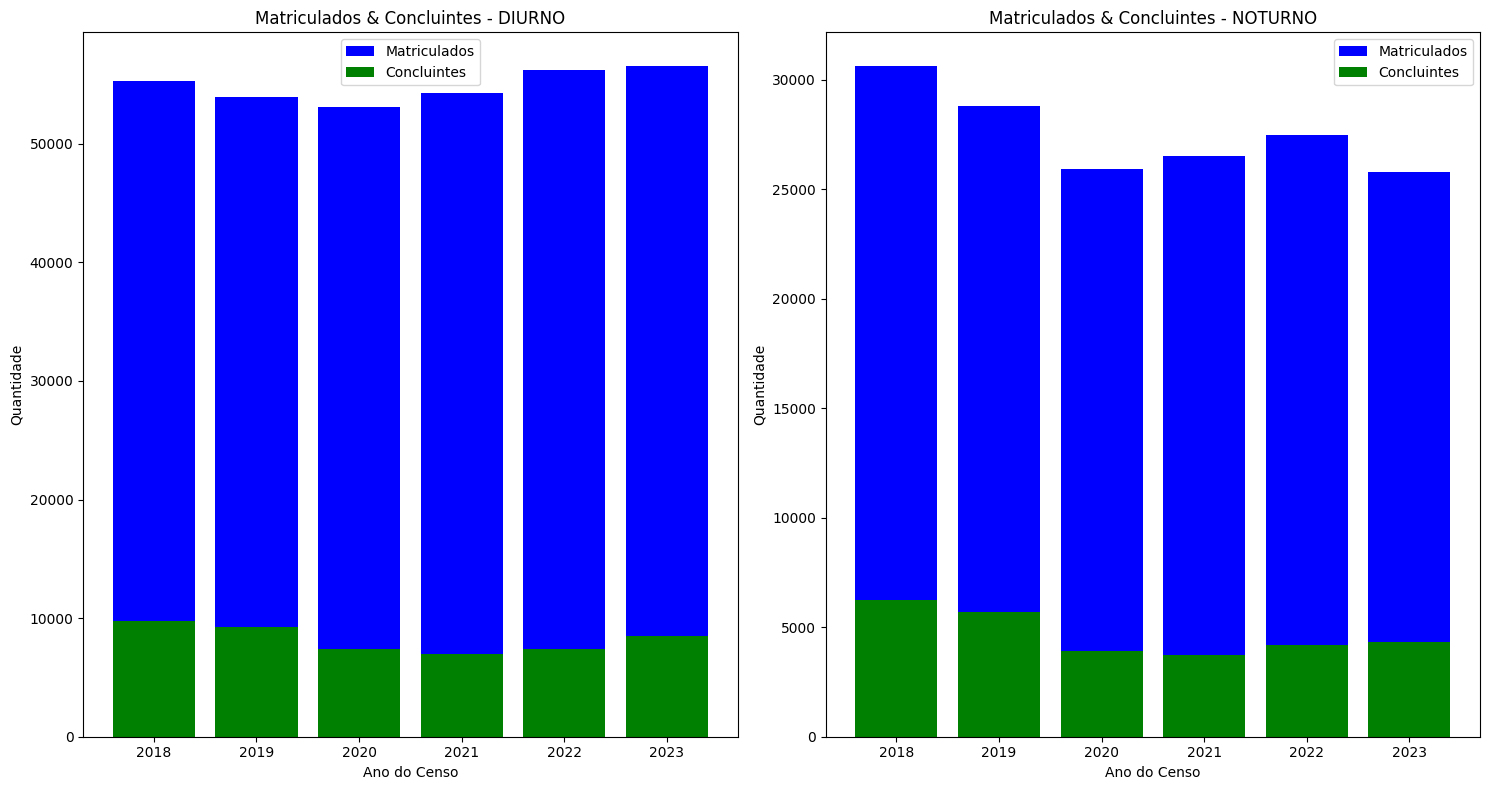

In [65]:

# Agrupando os dados corretamente
dados_diurno = dados_censo_padronizado.groupby('NU_ANO_CENSO')[['QT_MAT_DIURNO', 'QT_CONC_DIURNO']].sum()
dados_noturno = dados_censo_padronizado.groupby('NU_ANO_CENSO')[['QT_MAT_NOTURNO', 'QT_CONC_NOTURNO']].sum()

# Criando os subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Gráfico do período diurno
ax[0].bar(dados_diurno.index, dados_diurno['QT_MAT_DIURNO'], label='Matriculados', color='blue')
ax[0].bar(dados_diurno.index, dados_diurno['QT_CONC_DIURNO'], label='Concluintes', color='green')

ax[0].set_title("Matriculados & Concluintes - DIURNO")
ax[0].set_xlabel("Ano do Censo")
ax[0].set_ylabel("Quantidade")
ax[0].legend()

# Gráfico do período noturno
ax[1].bar(dados_noturno.index, dados_noturno['QT_MAT_NOTURNO'], label='Matriculados', color='blue')
ax[1].bar(dados_noturno.index, dados_noturno['QT_CONC_NOTURNO'], label='Concluintes', color='green')

ax[1].set_title("Matriculados & Concluintes - NOTURNO")
ax[1].set_xlabel("Ano do Censo")
ax[1].set_ylabel("Quantidade")
ax[1].legend()

# Ajustando layout para melhor visualização
plt.tight_layout()
plt.show()

In [66]:
dados_censo_padronizado.groupby(by=['NU_ANO_CENSO'])[['QT_MAT_DIURNO','QT_CONC_DIURNO','QT_MAT_NOTURNO','QT_CONC_NOTURNO']].sum()

,QT_MAT_DIURNO,QT_CONC_DIURNO,QT_MAT_NOTURNO,QT_CONC_NOTURNO
NU_ANO_CENSO,,,,
2018,55279.0,9770.0,30641.0,6261.0
2019,53918.0,9259.0,28809.0,5685.0
2020,53084.0,7428.0,25946.0,3902.0
2021,54288.0,6978.0,26506.0,3737.0
2022,56237.0,7423.0,27471.0,4198.0
2023,56564.0,8523.0,25775.0,4314.0


⏰ Análise por Turno: Matriculas e Formandos (2018–2023)
Observa-se que o turno da manhã (diurno) é a opção predominante ao longo dos anos, apresentando maiores números de matrículas e formandos quando comparado ao turno noturno.

| Ano  | Matrículas Diurno | Formandos Diurno | Matrículas Noturno | Formandos Noturno |
|-------|-------------------|------------------|--------------------|-------------------|
| 2018  | 55.279            | 9.770            | 30.641             | 6.261             |
| 2023  | 56.564            | 8.523            | 25.775             | 4.314             |

Em 2018, o turno diurno teve 55.279 matrículas e 9.770 formandos, enquanto o noturno registrou 30.641 matrículas e 6.261 formandos.

Em 2023, o diurno manteve-se estável com 56.564 matrículas e 8.523 formandos, já o noturno apresentou uma queda para 25.775 matrículas e 4.314 formandos.

In [67]:
dados_censo_padronizado['NO_CINE_AREA_GERAL'].unique()

array(['NEGOCIOS, ADMINISTRACAO E DIREITO',
       'AGRICULTURA, SILVICULTURA, PESCA E VETERINARIA',
       'ENGENHARIA, PRODUCAO E CONSTRUCAO',
       'CIENCIAS SOCIAIS, COMUNICACAO E INFORMACAO',
       'ARTES E HUMANIDADES', 'EDUCACAO',
       'CIENCIAS NATURAIS, MATEMATICA E ESTATISTICA',
       'COMPUTACAO E TECNOLOGIAS DA INFORMACAO E COMUNICACAO (TIC)',
       'SAUDE E BEM-ESTAR', 'SERVICOS', 'PROGRAMAS BASICOS'], dtype=object)

### 3. A evasão é diferente entre mulheres e homens?

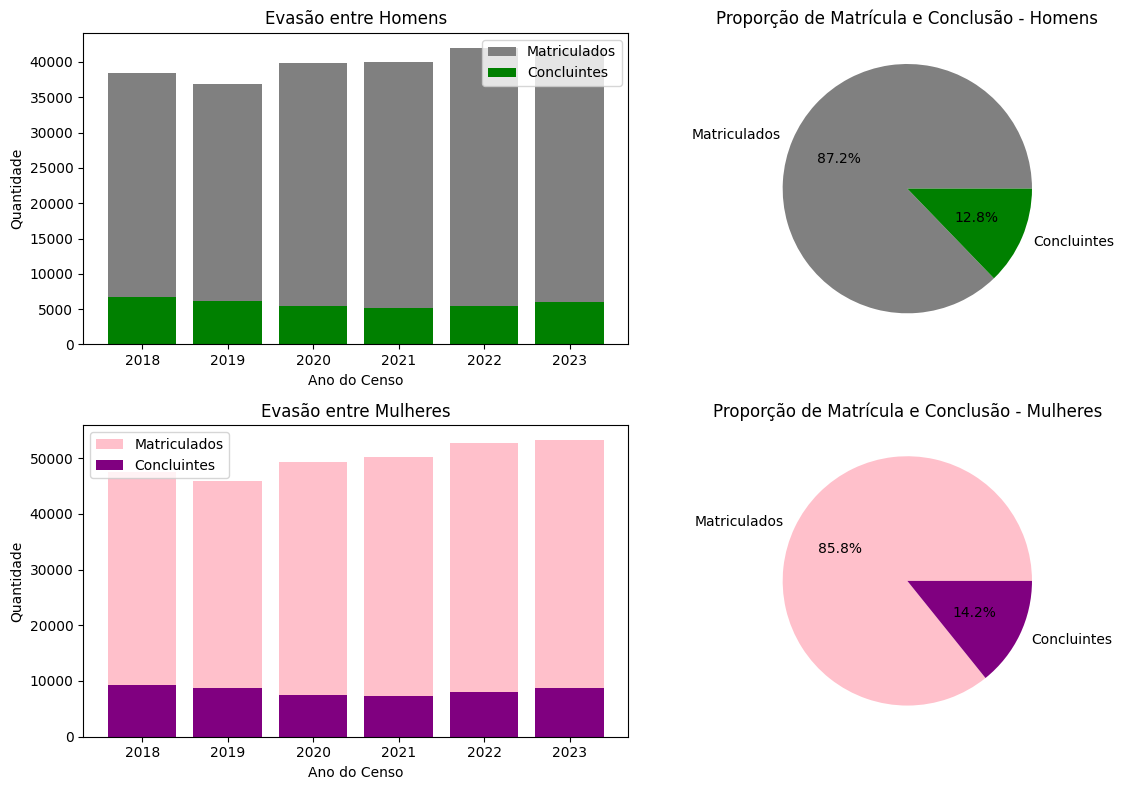

In [68]:
import matplotlib.pyplot as plt

# Agrupando os dados corretamente
dados_agrupados = dados_censo_padronizado.groupby('NU_ANO_CENSO').sum()

# Criando a figura e os subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico de barras para homens
ax[0][0].set_title("Evasão entre Homens")
ax[0][0].bar(dados_agrupados.index, dados_agrupados['QT_MAT_MASC'], label='Matriculados', color='grey')
ax[0][0].bar(dados_agrupados.index, dados_agrupados['QT_CONC_MASC'], label='Concluintes', color='green')
ax[0][0].set_xlabel("Ano do Censo")
ax[0][0].set_ylabel("Quantidade")
ax[0][0].legend()

# Gráfico de pizza para homens
ax[0][1].set_title("Proporção de Matrícula e Conclusão - Homens")
ax[0][1].pie(
    [dados_agrupados['QT_MAT_MASC'].sum(), dados_agrupados['QT_CONC_MASC'].sum()],
    labels=['Matriculados', 'Concluintes'],
    autopct='%1.1f%%',
    colors=['grey', 'green']
)

# Gráfico de barras para mulheres
ax[1][0].set_title("Evasão entre Mulheres")
ax[1][0].bar(dados_agrupados.index, dados_agrupados['QT_MAT_FEM'], label="Matriculados", color='pink')
ax[1][0].bar(dados_agrupados.index, dados_agrupados['QT_CONC_FEM'], label="Concluintes", color='purple')
ax[1][0].set_xlabel("Ano do Censo")
ax[1][0].set_ylabel("Quantidade")
ax[1][0].legend()

# Gráfico de pizza para mulheres
ax[1][1].set_title("Proporção de Matrícula e Conclusão - Mulheres")
ax[1][1].pie(
    [dados_agrupados['QT_MAT_FEM'].sum(), dados_agrupados['QT_CONC_FEM'].sum()],
    labels=['Matriculados', 'Concluintes'],
    autopct='%1.1f%%',
    colors=['pink', 'purple']
)

# Ajustando layout para melhor visualização
plt.tight_layout()
plt.show()

Os dados indicam que, ao longo dos anos analisados (2018-2023), há uma diferença considerável entre o número de matrículas e o número de conclusões tanto para homens quanto para mulheres. Observa-se que, apesar de um número elevado de alunos se matricularem, uma parcela significativa não conclui os estudos.

Comparando os gêneros, homens apresentam uma taxa de conclusão um pouco maior que mulheres, mas em ambos os casos, a diferença entre matriculados e concluintes ainda é visível. Isso pode indicar desafios estruturais, como evasão escolar, dificuldades financeiras ou falta de acesso a recursos educacionais suficientes


### 4. A evasão varia entre faixas etárias?

In [69]:
# Somando individualmente cada faixa etária
mat_0_17 = dados_censo_padronizado['QT_MAT_0_17'].sum()
mat_18_24 = dados_censo_padronizado['QT_MAT_18_24'].sum()
mat_25_29 = dados_censo_padronizado['QT_MAT_25_29'].sum()
mat_30_34 = dados_censo_padronizado['QT_MAT_30_34'].sum()
mat_35_39 = dados_censo_padronizado['QT_MAT_35_39'].sum()
mat_40_49 = dados_censo_padronizado['QT_MAT_40_49'].sum()
mat_50_59 = dados_censo_padronizado['QT_MAT_50_59'].sum()
mat_60_mais = dados_censo_padronizado['QT_MAT_60_MAIS'].sum()

# Exibindo os valores
print(f"Matriculados 0 a 17 anos: {mat_0_17}")
print(f"Matriculados 18 a 24 anos: {mat_18_24}")
print(f"Matriculados 25 a 29 anos: {mat_25_29}")
print(f"Matriculados 30 a 34 anos: {mat_30_34}")
print(f"Matriculados 35 a 39 anos: {mat_35_39}")
print(f"Matriculados 40 a 49 anos: {mat_40_49}")
print(f"Matriculados 50 a 59 anos: {mat_50_59}")
print(f"Matriculados 60 anos ou mais: {mat_60_mais}")

Matriculados 0 a 17 anos: 1301.0
Matriculados 18 a 24 anos: 364877.0
Matriculados 25 a 29 anos: 84921.0
Matriculados 30 a 34 anos: 32084.0
Matriculados 35 a 39 anos: 21224.0
Matriculados 40 a 49 anos: 23571.0
Matriculados 50 a 59 anos: 7859.0
Matriculados 60 anos ou mais: 1750.0


<BarContainer object of 8 artists>

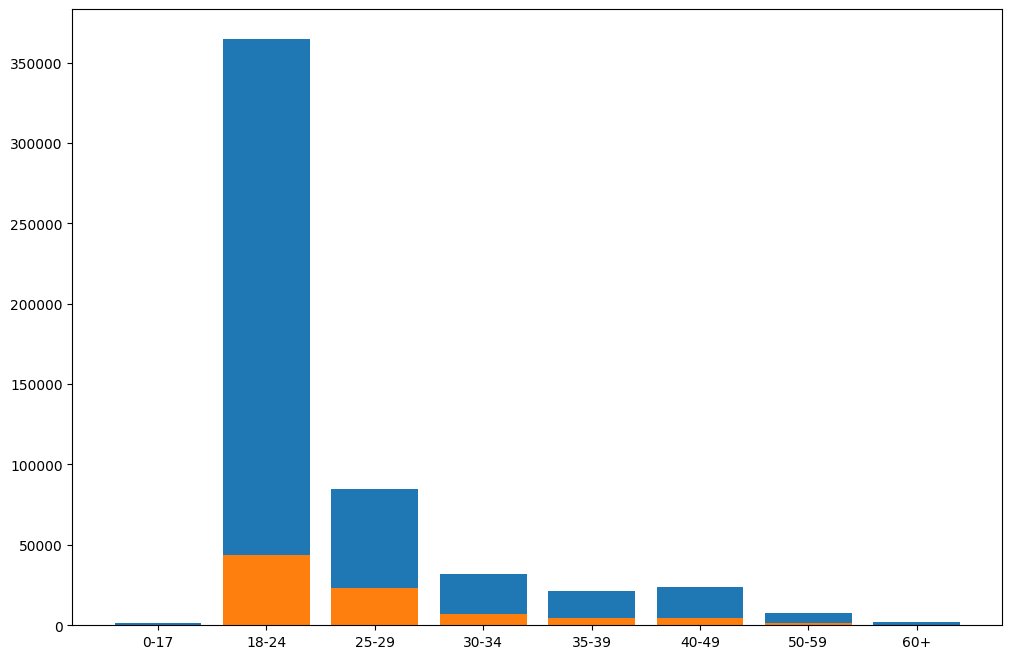

In [70]:
faixa_etaria_mat = ['QT_MAT_0_17', 'QT_MAT_18_24','QT_MAT_25_29', 'QT_MAT_30_34', 'QT_MAT_35_39', 'QT_MAT_40_49','QT_MAT_50_59', 'QT_MAT_60_MAIS']
faixa_etaria_conc = ['QT_CONC_0_17', 'QT_CONC_18_24', 'QT_CONC_25_29','QT_CONC_30_34', 'QT_CONC_35_39', 'QT_CONC_40_49', 'QT_CONC_50_59','QT_CONC_60_MAIS']

faixa_etaria_padronizada = ['0-17', '18-24', '25-29', '30-34', '35-39', '40-49', '50-59', '60+']
fig,ax = plt.subplots(figsize=(12,8))
valores_mat = dados_censo_padronizado[faixa_etaria_mat].sum()  # soma todas as linhas para cada faixa etária
valores_conc = dados_censo_padronizado[faixa_etaria_conc].sum()  

ax.bar(faixa_etaria_padronizada,valores_mat)
ax.bar(faixa_etaria_padronizada,valores_conc)


 ### 5. A cor/raça influencia na taxa de evasão?

<BarContainer object of 6 artists>

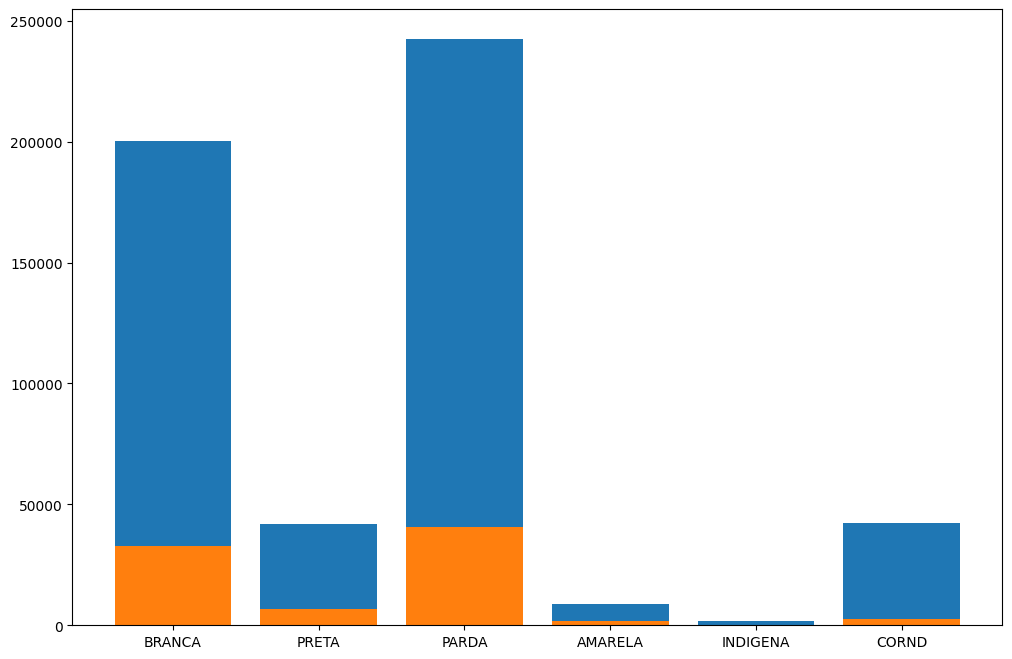

In [71]:
cor_raca_mat = ['QT_MAT_BRANCA', 'QT_MAT_PRETA','QT_MAT_PARDA', 'QT_MAT_AMARELA', 'QT_MAT_INDIGENA', 'QT_MAT_CORND']
cor_raca_conc = ['QT_CONC_BRANCA', 'QT_CONC_PRETA', 'QT_CONC_PARDA','QT_CONC_AMARELA', 'QT_CONC_INDIGENA', 'QT_CONC_CORND']

cor_raca_padronizada = ['BRANCA', 'PRETA', 'PARDA', 'AMARELA', 'INDIGENA', 'CORND']
fig,ax = plt.subplots(figsize=(12,8))
valores_mat = dados_censo_padronizado[cor_raca_mat].sum()  # soma todas as linhas para cada faixa etária
valores_conc = dados_censo_padronizado[cor_raca_conc].sum()  

ax.bar(cor_raca_padronizada,valores_mat)
ax.bar(cor_raca_padronizada,valores_conc)


### 6. Alunos com deficiência têm maior evasão?

In [72]:
dados_censo_padronizado['QT_MAT_DEFICIENTE'].sum()

np.float64(3761.0)

<BarContainer object of 1 artists>

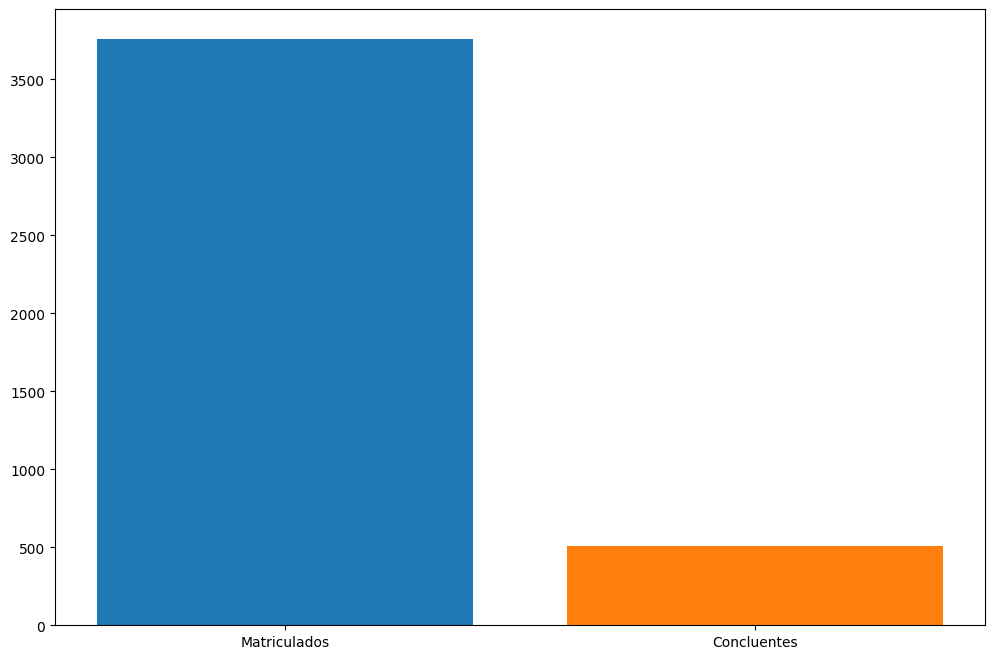

In [73]:
fig,ax = plt.subplots(figsize=(12,8))
valores_mat = dados_censo_padronizado['QT_MAT_DEFICIENTE'].sum() 
valores_conc = dados_censo_padronizado['QT_CONC_DEFICIENTE'].sum()  

ax.bar('Matriculados',valores_mat)
ax.bar("Concluentes",valores_conc)

       

 ### 7.A evasão é diferente entre cursos de áreas diferentes?

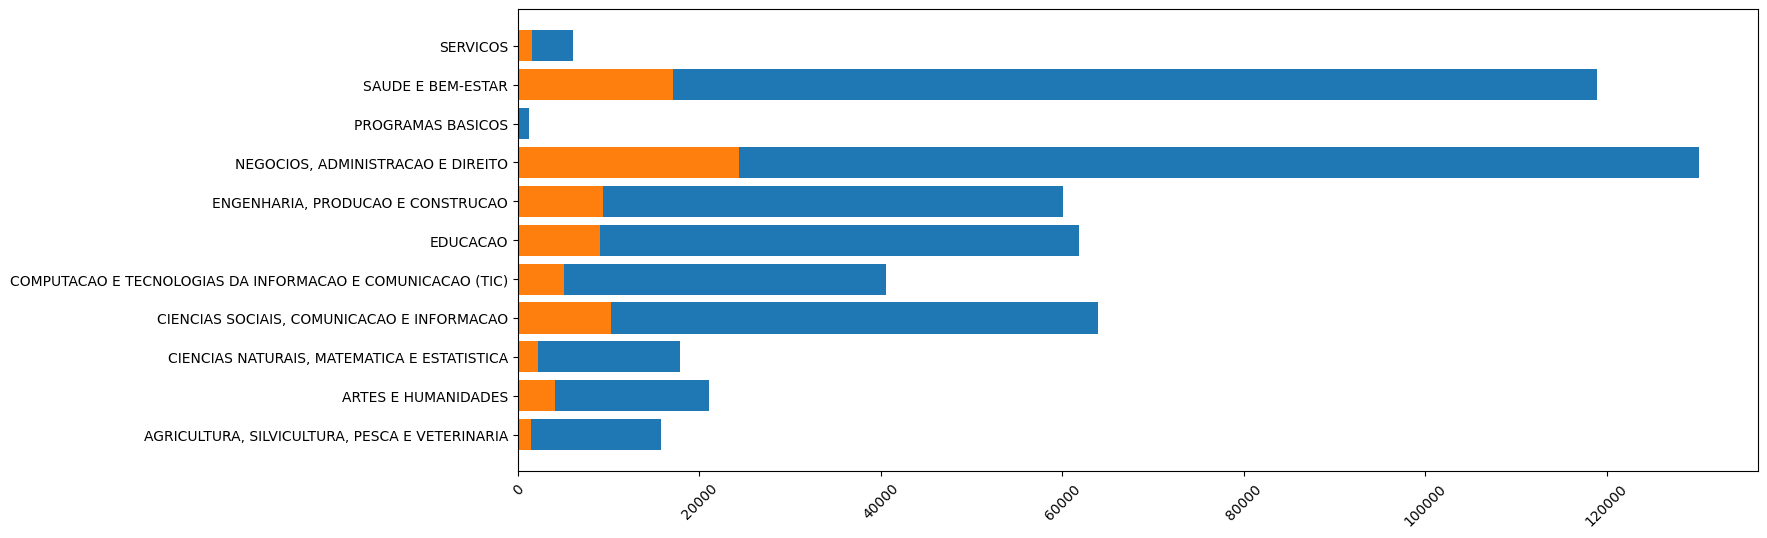

In [74]:
fig,ax = plt.subplots(figsize=(16,6))
agrupando_curso_geral = dados_censo_padronizado.groupby(by='NO_CINE_AREA_GERAL').sum()

ax.barh(agrupando_curso_geral.index,agrupando_curso_geral['QT_MAT'])
ax.barh(agrupando_curso_geral.index,agrupando_curso_geral['QT_CONC'])

plt.xticks(rotation=45)

plt.show()


- Em Negócios, Administração e Direito, há um número expressivo de matrículas, mas o número de concluintes parece bem menor. Isso pode indicar desafios na retenção ou conclusão desses cursos.

- Serviços segue um padrão semelhante, com muitas matrículas e um número relativamente menor de concluintes.

- Em Engenharia, Produção e Construção, a diferença entre matrículas e concluintes também é perceptível, sugerindo 
possíveis dificuldades na trajetória acadêmica.

- Saúde e Bem-Estar mantém um volume alto de matrículas, e embora haja menos concluintes, o número ainda é relevante.

- Computação e TIC tem um número expressivo de matrículas, mas os concluintes representam uma fração menor, possivelmente indicando desafios na finalização do curso.

- Ciências Sociais, Comunicação e Informação apresenta uma proporção relativamente mais equilibrada entre matrículas e concluintes.

- Programas Básicos possuem os menores números em ambas as categorias, o que pode indicar menor procura ou duração mais curta desses cursos.


### Entendendo melhor a evasão em cursos de NEGOCIOS,ADMINISTRAÇÃO E DIREITO

In [75]:
dados_censo_padronizado[dados_censo_padronizado['NO_CINE_AREA_GERAL'] == "NEGOCIOS, ADMINISTRACAO E DIREITO"]['NO_CINE_AREA_ESPECIFICA'].unique()

array(['NEGOCIOS E ADMINISTRACAO', 'DIREITO'], dtype=object)

In [76]:

negocio_adm = dados_censo_padronizado[dados_censo_padronizado['NO_CINE_AREA_ESPECIFICA'].isin(["NEGOCIOS E ADMINISTRACAO","DIREITO"])]

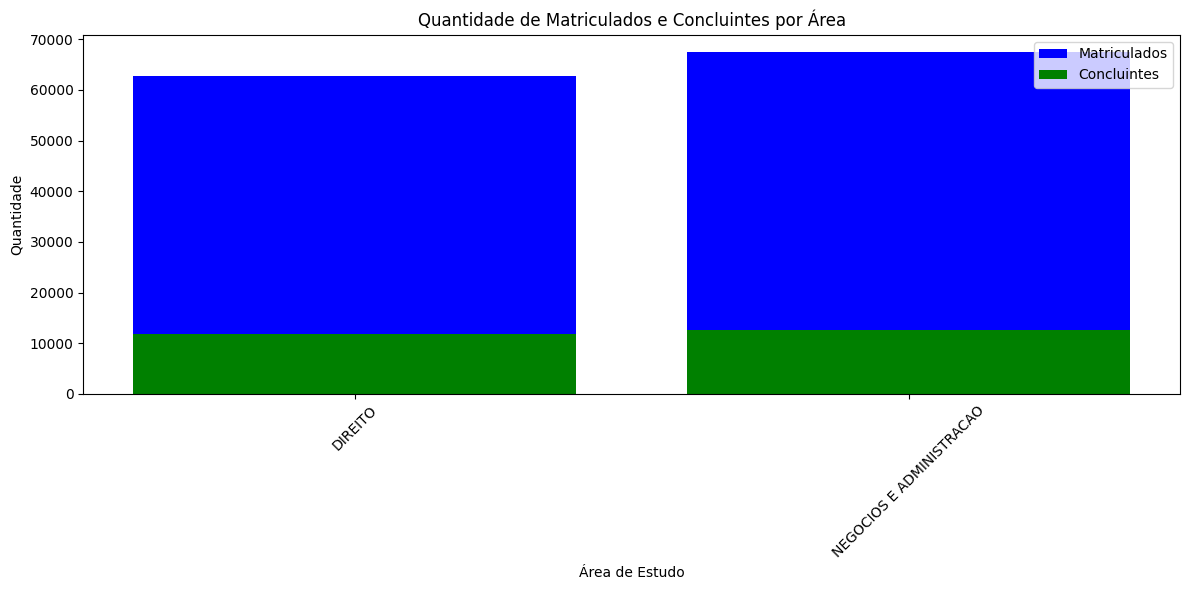

In [77]:

negocio_adm_agrupado = negocio_adm.groupby('NO_CINE_AREA_ESPECIFICA')[['QT_MAT', 'QT_CONC']].sum()

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(negocio_adm_agrupado.index, negocio_adm_agrupado['QT_MAT'], label='Matriculados', color='blue')
ax.bar(negocio_adm_agrupado.index, negocio_adm_agrupado['QT_CONC'], label='Concluintes', color='green')

ax.set_title("Quantidade de Matriculados e Concluintes por Área")
ax.set_xlabel("Área de Estudo")
ax.set_ylabel("Quantidade")
ax.legend()

plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

### Verificando a evasão em cursos mais especifico

In [78]:
dados_censo_padronizado['Taxa_evasao_geral'] = dados_censo_padronizado['QT_MAT'] - dados_censo_padronizado['QT_CONC'] 

In [79]:
# Pegando os 5 cursos com maior taxa de evasão
top5 = dados_censo_padronizado.groupby(by='NO_CINE_AREA_DETALHADA')[['Taxa_evasao_geral']].sum().rename(columns={'Taxa_evasao_geral':"Taxa_de_evasao"}).nlargest(5,'Taxa_de_evasao').reset_index()
#nlargeste pega as cinco primeira linhas desse agrupamento e coloca esse nome na coluna dos valores.

In [80]:
top5

,NO_CINE_AREA_DETALHADA,Taxa_de_evasao
0,DIREITO,50826.0
1,"PROMOCAO, PREVENCAO, TERAPIA E REABILITACAO",31088.0
2,GESTAO E ADMINISTRACAO,29375.0
3,FORMACAO DE PROFESSORES EM AREAS ESPECIFICAS (...,27774.0
4,PSICOLOGIA,27405.0


In [81]:
top5_agrupado = dados_censo_padronizado[dados_censo_padronizado['NO_CINE_AREA_DETALHADA'].isin(top5['NO_CINE_AREA_DETALHADA'])]

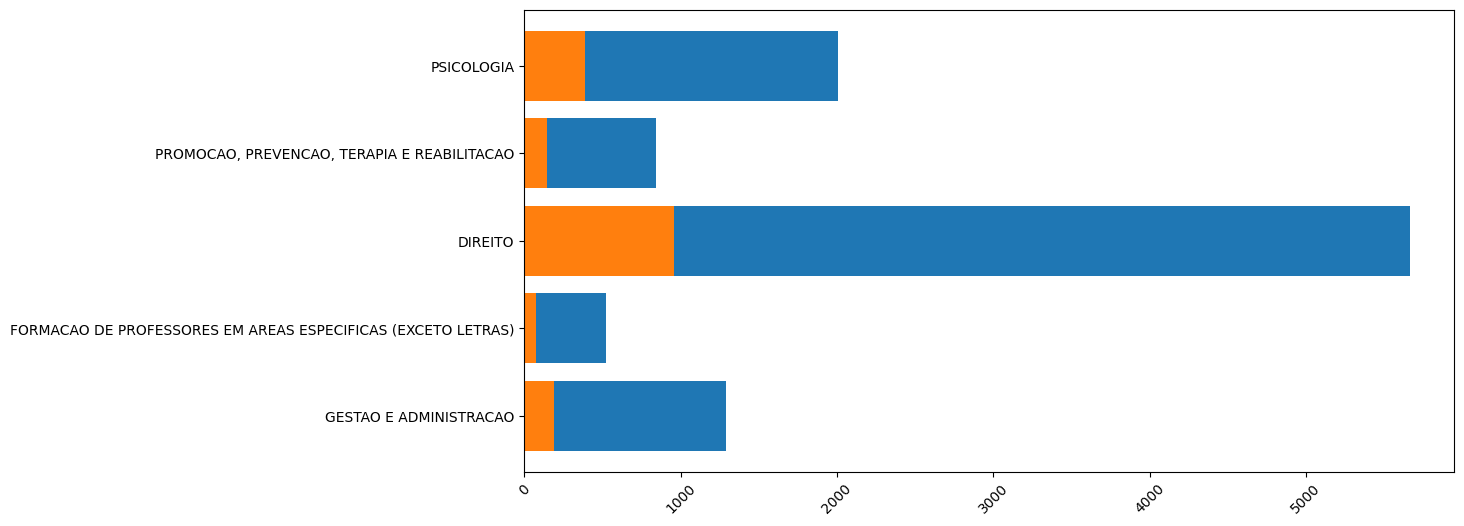

In [82]:
fig,ax = plt.subplots(figsize=(12,6))

ax.barh(top5_agrupado['NO_CINE_AREA_DETALHADA'],top5_agrupado['QT_MAT'])
ax.barh(top5_agrupado['NO_CINE_AREA_DETALHADA'],top5_agrupado['QT_CONC'])

plt.xticks(rotation=45)

plt.show()

🎓 Resumo: Comparação entre Cursos - Matrículas x Concluintes

Direito: Maior número de matrículas, mas grande queda nos concluintes → indica alta evasão ou formação longa.

Gestão/Administração: Muitas matrículas, mas baixa taxa de conclusão.

Psicologia: Alto número de ingressos, porém grande diferença para os concluintes, sinalizando desafios na formação.

Formação de Professores (Áreas Específicas) | Promoção, Prevenção, Terapia e Reabilitação: 

    -Menos matrículas, mas com retenção mais próximo dos concluintes, em comparação com as demais

### 8. Existe algum cursos com uma taxa maior para o sexo Feminino em comparação ao masculino?

In [83]:
colunas_fem = ["QT_MAT_FEM", "QT_CONC_FEM"]
dados_fem = dados_censo_padronizado.groupby("NO_CINE_AREA_GERAL")[colunas_fem].sum()

fig_fem = go.Figure()
fig_fem.add_trace(go.Bar(
    x=dados_fem.index,
    y=dados_fem["QT_MAT_FEM"],
    name="Matriculados Femininos",
    marker_color="pink"
))
fig_fem.add_trace(go.Bar(
    x=dados_fem.index,
    y=dados_fem["QT_CONC_FEM"],
    name="Concluintes Femininos",
    marker_color="purple"
))

fig_fem.update_layout(
    title="Matriculados e Concluintes (Feminino)",
    barmode="group",
    yaxis_range=[0, maior_valor_y * 1.1]
)

fig_fem.show()

In [84]:
colunas_masc = ["QT_MAT_MASC", "QT_CONC_MASC"]
dados_masc = dados_censo_padronizado.groupby("NO_CINE_AREA_GERAL")[colunas_masc].sum()

fig_masc = go.Figure()
fig_masc.add_trace(go.Bar(
    x=dados_masc.index,
    y=dados_masc["QT_MAT_MASC"],
    name="Matriculados Masculinos",
    marker_color="blue"
))
fig_masc.add_trace(go.Bar(
    x=dados_masc.index,
    y=dados_masc["QT_CONC_MASC"],
    name="Concluintes Masculinos",
    marker_color="green"
))

fig_masc.update_layout(
    title="Matriculados e Concluintes (Masculino)",
    barmode="group",
    yaxis_range=[0, maior_valor_y * 1.1]
)

fig_masc.show()





Ao analisarmos os dados por área de formação, alguns padrões interessantes surgem. Nos cursos de Computação e TIC, o público masculino é claramente dominante, com cerca de 35 mil homens matriculados e uma taxa de conclusão de 12,3%. Já entre as mulheres, embora em menor número (aproximadamente 6 mil matriculadas), a taxa de conclusão é ligeiramente superior, atingindo 12,9%.

Por outro lado, nos cursos da área de Saúde e Bem-Estar, o cenário se inverte: as mulheres representam a maioria, com cerca de 86 mil matriculadas, e uma taxa de conclusão de 14,8%. Os homens, com aproximadamente 33 mil matrículas, têm uma taxa de conclusão um pouco menor, em torno de 13,4%.

### . A evasão é maior em cursos EAD?

In [85]:
import plotly.graph_objects as go

colunas_analise = ["QT_MAT", "QT_CONC"]
instituicoes = ['UNB', 'UNICEUB', 'UCB', 'UDF', 'IESB']

# Criar um dicionário para armazenar os gráficos
figs = {}

for ies in instituicoes:
    dados_ies = dados_censo_padronizado[dados_censo_padronizado["SG_IES"] == ies].groupby("NO_CINE_AREA_GERAL")[colunas_analise].sum().reset_index()
    maior_valor_y = dados_ies[colunas_analise].max().max()

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=dados_ies["NO_CINE_AREA_GERAL"],
        y=dados_ies["QT_MAT"],
        name="Matriculados",
        marker_color="blue"
    ))
    fig.add_trace(go.Bar(
        x=dados_ies["NO_CINE_AREA_GERAL"],
        y=dados_ies["QT_CONC"],
        name="Concluintes",
        marker_color="green"
    ))

    fig.update_layout(
        title=f"Matriculados e Concluintes - {ies}",
        barmode="group",
        yaxis_range=[0, maior_valor_y * 1.1],
        xaxis_title="Cursos",
        yaxis_title="Quantidade"
    )

    # Armazena o gráfico no dicionário
    figs[ies] = fig

# Exibir todos os gráficos
for ies, fig in figs.items():
    fig.show()

### 9. Como se distribui as matriculas e conclusões do curso entre Redes privadas e públicas?

In [86]:
dados_agrupados2 = dados_censo_padronizado.groupby(['NO_CURSO', 'TP_REDE']).agg({
    'QT_MAT': 'sum',
    'QT_CONC': 'sum'
}).reset_index()


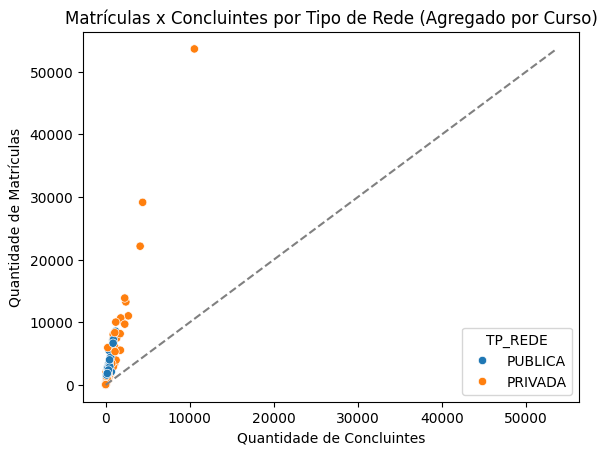

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns


max_val = max(dados_agrupados2['QT_MAT'].max(), dados_agrupados2['QT_CONC'].max())
plt.plot([0, max_val], [0, max_val], '--', color='gray')  # linha de referência

sns.scatterplot(data=dados_agrupados2, x='QT_CONC', y='QT_MAT', hue='TP_REDE')
plt.title('Matrículas x Concluintes por Tipo de Rede (Agregado por Curso)')
plt.xlabel('Quantidade de Concluintes')
plt.ylabel('Quantidade de Matrículas')
plt.show()

O gráfico mostra que, em todos os cursos analisados, o número de concluintes é sempre menor que o de matrículas, indicando evasão em 100% dos casos. A maioria dos cursos da rede privada (laranja) tem muito mais matrículas do que concluintes, o que sugere uma evasão mais alta nesse setor. Já os cursos da rede pública (azul) estão mais próximos da linha de igualdade, indicando uma retenção um pouco melhor. O gráfico evidencia que a evasão é um problema generalizado, mas mais acentuado na rede privada. Isso pode estar ligado a fatores como custos, suporte ao aluno e qualidade dos cursos.

-------------------------


### 10. A evasão é maior em cursos EAD?

In [88]:
dados_censo_padronizado['TP_MODALIDADE_ENSINO'].unique()

array(['PRESENCIAL', 'CURSO A DISTANCIA'], dtype=object)

([0, 1], [Text(0, 0, 'CURSO A DISTANCIA'), Text(1, 0, 'PRESENCIAL')])

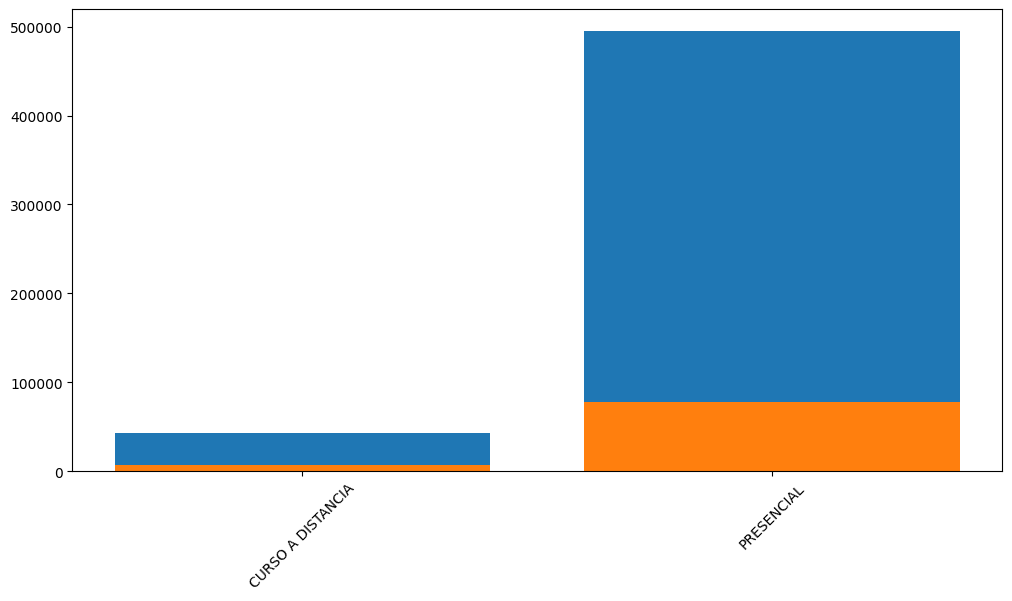

In [89]:
fig,ax = plt.subplots(figsize=(12,6))
agrupando_modalidade_ensino= dados_censo_padronizado.groupby(by='TP_MODALIDADE_ENSINO').sum()

ax.bar(agrupando_modalidade_ensino.index,agrupando_modalidade_ensino['QT_MAT'])
ax.bar(agrupando_modalidade_ensino.index,agrupando_modalidade_ensino['QT_CONC'])

plt.xticks(rotation=45)

Verifica-se que os cursos presenciais apresentam, em geral, um número significativamente maior de matrículas em comparação aos cursos a distância. No entanto, ambos os formatos registram altas taxas de não concluintes. Ainda assim, ao observarmos proporcionalmente, os cursos a distância tendem a apresentar uma taxa de conclusão relativamente maior, mesmo com um número menor de matriculados.

# Conclusão

🧩 Conclusão Geral da Análise – Matrículas x Concluintes no Ensino Superior (2018–2023)
A análise dos dados entre os anos de 2018 a 2023 revela um cenário preocupante e multifacetado sobre a trajetória dos estudantes no ensino superior. De forma geral, nota-se um aumento contínuo nas matrículas, indicando que mais pessoas estão tendo acesso à universidade. No entanto, esse crescimento não tem sido acompanhado por um aumento proporcional nos concluintes, o que aponta para uma taxa significativa de evasão ao longo dos cursos.

Em todas as seis instituições analisadas, observamos que o número de concluintes é consideravelmente menor que o de matriculados. Isso levanta questionamentos sobre a qualidade da permanência e os obstáculos enfrentados pelos estudantes durante a jornada acadêmica — sejam eles estruturais, pedagógicos, financeiros ou sociais.

Um aspecto que chama atenção é a diferença por gênero: homens têm menor taxa de conclusão em comparação às mulheres, mesmo sendo maioria em cursos como Computação e Tecnologia da Informação. Já nas áreas da Saúde e Bem-Estar, há predominância feminina nas matrículas e uma taxa de conclusão ligeiramente maior. Essa distribuição aponta para uma possível associação entre gênero e áreas de interesse, mas também levanta hipóteses sobre barreiras e desestímulos específicos enfrentados por cada grupo.

A questão racial também se mostra alarmante. Pretos, pardos, indígenas e amarelos estão sub-representados entre os concluintes, especialmente quando comparados à população branca. A média de concluintes pretos por curso é de apenas 2, frente a 14 brancos e 17 pardos. Isso evidencia uma desigualdade estrutural que vai além do ingresso, refletindo falta de apoio, políticas de permanência, acessibilidade e inclusão ao longo dos cursos.

Outro ponto crítico é a baixíssima participação de pessoas com mais de 60 anos. A média de concluintes dessa faixa etária é praticamente nula, revelando desafios sérios para uma educação verdadeiramente inclusiva e ao longo da vida.

Ainda que alguns cursos apresentem melhores índices de retenção (como Formação de Professores ou áreas de Terapia e Promoção da Saúde), outros como Computação, Engenharia, Administração e Direito mostram um padrão de grande evasão. Esses dados indicam que a evasão não está distribuída de forma homogênea, e que diferentes áreas podem demandar estratégias específicas de apoio.

Por fim, é fundamental destacar que o aumento nas matrículas é um avanço, mas ele precisa vir acompanhado de políticas eficazes de permanência, acessibilidade e suporte emocional, pedagógico e financeiro aos estudantes. Sem isso, o ensino superior continuará sendo um espaço de ingresso sem saída para muitos — principalmente para os mais vulneráveis.